
<h1 style="text-align: center;">Canada</h1>

<h3 style="text-align: center;">A comparitive study of Immigration rates </h3>


<h3 style="text-align: center;">Problem Statement</h3>
<p>To Compare and analyse immigration patterns, demographics, socioeconomic factors, and policies between Germany and Canada </p>

<h3 style="text-align: center;">Dataset Description</h3>

Canadaian Dataset Source:<a href="https://www.canada.ca/en/services/immigration-citizenship.html"> Open.canada.ca</a>

Fatalities Dataset Source: <a href="https://acleddata.com/explorer/">Acleddata.com</a>

<ul>
  <li>
    <p>Canadaian Dataset Source</p>
    <ul>
        <li><p>Number of observations: <b>110 rows</b></p></li>
        <li><p>Number of variables per observation: <b>215 columns</b></p></li>
    </ul>
  </li>
  <br>
  <li>
    <p>Fatalities Dataset Source</p>
    <ul>
        <li><p>Number of observations:<b> 14356 rows</b></p></li>
        <li><p>Number of variables per observation: <b>3 columns</b></p></li>
    </ul>
  </li>
</ul>


In [1]:
import pandas as pd

df_can = pd.read_excel("EN_ODP-PR-Citz.xlsx")
df_fatalitie = pd.read_csv("country_time_fatalities.csv")

# number of rows and columns for immigration df
print(f"Number of rows(immigartion df): {df_can.shape[0]}")
print(f"Number of columns(immigartion df): {df_can.shape[1]}")

print("-----------------------------------------")

# number of rows and columns for fatalities df
print(f"Number of rows(fatalitie df) : {df_fatalitie.shape[0]}")
print(f"Number of columns (fatalitie df): {df_fatalitie.shape[1]}")

Number of rows(immigartion df): 221
Number of columns(immigartion df): 158
-----------------------------------------
Number of rows(fatalitie df) : 14356
Number of columns (fatalitie df): 3


 <b>We are analysing the following aspects of the data:</b>
- <p>Total immigration over time</p>
- <p>Seasonal variation</p>
- <p>Impact of COVID-19</p>
- <p>Geographical Distribution</p>
- <p>Country-Specific Trends</p>
- <p>Monthly Trends </p>
- <p> Effect of Fatalities on Immigration </p>


<h3 style="text-align: center;">Loading Packages</h3> 

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import re
import plotly.graph_objects as go
from scipy.stats import ttest_rel
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
import scipy.stats as scis

In [3]:
# raw dataset for immigration
df_can = pd.read_excel("EN_ODP-PR-Citz.xlsx", skiprows=4)
df_can.head()

,Unnamed: 0,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,...,Q3 Total.8,Oct.8,Nov.8,Dec.8,Q4 Total.8,Unnamed: 153,Jan.9,Feb.9,Q1 Total.9,Unnamed: 157
0,Afghanistan,90,125,220,435,135,220,195,555,250,...,"5,460","1,400","3,465","2,180","7,045","20,180","1,825","1,740","3,565","3,565"
1,Albania,15,25,50,90,45,45,75,165,45,...,175,40,40,50,125,655,110,60,170,170
2,Algeria,80,125,235,440,255,340,280,875,310,...,"1,960",540,335,280,"1,160","5,245",400,395,795,795
3,Andorra,0,0,0,0,--,0,0,--,0,...,0,0,0,0,0,--,0,0,0,0
4,Angola,--,0,--,--,10,--,--,15,--,...,25,25,15,35,75,235,20,20,40,40


<h3 style="text-align: center;">Data Cleanup: Canadian Dataset</h3> 

<b> Setting the country as index </b>

In [4]:
# get countries (names)
countries = df_can.iloc[:, 0]
# set countries as index
df_can.set_index(countries, inplace=True)
# drop the old countries column
df_can.drop(df_can.columns[0], axis=1, inplace=True)
# rename the rows to "Country"
df_can = df_can.rename_axis("Country", axis="rows")

df_can.head()

,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,Aug,...,Q3 Total.8,Oct.8,Nov.8,Dec.8,Q4 Total.8,Unnamed: 153,Jan.9,Feb.9,Q1 Total.9,Unnamed: 157
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,90,125,220,435,135,220,195,555,250,145,...,"5,460","1,400","3,465","2,180","7,045","20,180","1,825","1,740","3,565","3,565"
Albania,15,25,50,90,45,45,75,165,45,65,...,175,40,40,50,125,655,110,60,170,170
Algeria,80,125,235,440,255,340,280,875,310,280,...,"1,960",540,335,280,"1,160","5,245",400,395,795,795
Andorra,0,0,0,0,--,0,0,--,0,--,...,0,0,0,0,0,--,0,0,0,0
Angola,--,0,--,--,10,--,--,15,--,--,...,25,25,15,35,75,235,20,20,40,40


<b> Cleaning and Renaming columns </b> 

In [5]:
# remove columns with quartiles (Q...) and total for the year (unnamed: ...)
columns_to_remove = []
columns_to_keep = []
for month in df_can.columns:
    if re.match(r"\b[A-Za-z0-9]{3}\b.\d", month):
        month = month[:-2]
        columns_to_keep.append(month)
    elif re.match(r"\bQ\d Total(.\d)\b|\bQ\d Total\b|\bUnnamed: \d{2,}", month):
        columns_to_remove.append(month)
    else:
        columns_to_keep.append(month)

# Drop the identified columns to remove from the dataframe
df_can = df_can.drop(columns=columns_to_remove)
df_can.columns = columns_to_keep

# set month name to columns
df_can = df_can.rename_axis("Months", axis="columns")


# change date to timestamp
month_abbreviation = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12,
}

date_row = []
year = 2014
for i in range(len(df_can.columns)):
    if df_can.columns[i] == "Jan":
        year += 1
    date_row.append(f"{year}-{month_abbreviation[df_can.columns[i]]}")

df_can.columns = date_row

df_can.head()

,2015-1,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,2015-9,2015-10,...,2023-5,2023-6,2023-7,2023-8,2023-9,2023-10,2023-11,2023-12,2024-1,2024-2
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,90,125,220,135,220,195,250,145,375,270,...,"2,225","1,430","2,000","1,250","2,210","1,400","3,465","2,180","1,825","1,740"
Albania,15,25,50,45,45,75,45,65,60,35,...,65,45,75,70,30,40,40,50,110,60
Algeria,80,125,235,255,340,280,310,280,355,225,...,510,530,875,325,760,540,335,280,400,395
Andorra,0,0,0,--,0,0,0,--,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,--,0,--,10,--,--,--,--,--,0,...,15,10,10,5,5,25,15,35,20,20


<b> Final Adjustments </b>

In [6]:
# replace "--" with None
df_can.replace("--", np.nan, inplace=True)

# replace "," with ""
df_can.replace(",", "", regex=True, inplace=True)

# Convert DataFrame to numeric
df_can = df_can.apply(pd.to_numeric, errors="coerce")

df_can_transposed = df_can.T
df_can_transposed = df_can_transposed.rename_axis("Year-Month", axis="rows")

# add timestamp
df_can_transposed.index = pd.to_datetime(df_can_transposed.index, format="%Y-%m")

# remove last two columns
df_can_transposed = df_can_transposed.iloc[:, :-2]

df_can = df_can_transposed

df_can.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,"Virgin Islands, British",Western Sahara,Yemen,Zambia,Zimbabwe
Year-Month,,,,,,,,,,,,,,,,,,,,,
2015-01-01,90.0,15.0,80.0,0.0,NaN,NaN,10.0,10.0,95.0,10.0,...,NaN,5.0,0.0,40.0,90.0,0.0,0.0,15.0,NaN,15.0
2015-02-01,125.0,25.0,125.0,0.0,0.0,5.0,15.0,10.0,70.0,10.0,...,NaN,5.0,0.0,40.0,165.0,0.0,0.0,5.0,0.0,15.0
2015-03-01,220.0,50.0,235.0,0.0,NaN,10.0,15.0,10.0,100.0,5.0,...,NaN,25.0,0.0,75.0,180.0,0.0,0.0,25.0,NaN,25.0
2015-04-01,135.0,45.0,255.0,NaN,10.0,NaN,25.0,20.0,145.0,10.0,...,NaN,15.0,0.0,80.0,155.0,0.0,0.0,20.0,NaN,15.0
2015-05-01,220.0,45.0,340.0,0.0,NaN,NaN,25.0,15.0,160.0,10.0,...,10.0,10.0,0.0,70.0,150.0,0.0,0.0,15.0,NaN,20.0


<h3 style="text-align: center;"> Fatalities </h3>

- <p><b>Nature of the data:</b> The fatalities dataset records the number of deaths due to organized violence</p>
- <p><b>Source :</b> The data was collected from a dataset that tracks fatalities resulting from conflicts and violent events across diffrent countries </p>
- <b>Types of violence Covered:</b>
    - Battles 
    - Explosions/Remote violence 
    - Violence against civilians 

In [7]:
# raw Dataset for fatalities
df_fatalitie = pd.read_csv("country_time_fatalities.csv")
df_fatalitie.head()

,Country,Event month,Fatalities
0,Afghanistan,2018-01-01,2811
1,Algeria,2018-01-01,15
2,Angola,2018-01-01,1
3,Argentina,2018-01-01,0
4,Armenia,2018-01-01,0


<h2 style="text-align: center;">Data Cleanup: Fatalities Dataset</h2> 

In [8]:
# df for fatalites due to Organized Violence in each country
df_fatalities = pd.read_csv("country_time_fatalities.csv")

# Pivot the DataFrame to have countries as columns and event months as rows
df_pivot = df_fatalities.pivot_table(
    index="Event month", columns="Country", values="Fatalities", aggfunc="sum"
)
# Fill any missing values with 0 to ensure there are no NaNs
df_pivot = df_pivot.fillna(0)

# Convert the index to datetime format for better time-series manipulation
df_pivot.index = pd.to_datetime(df_pivot.index, format="%Y-%m-%d")
# Assign the pivot table back to df_fatalities for further processing
df_fatalities = df_pivot

In [9]:
# Harmonize country names between the fatalities data and the immigration data
# This ensures that we can accurately merge and compare the datasets
# countries named differently in the two data sets

df_fatalities["Swaziland"] = df_fatalities["eSwatini"]
df_fatalities = df_fatalities.drop(columns="eSwatini")

df_fatalities["Myanmar (Burma)"] = df_fatalities["Myanmar"]
df_fatalities = df_fatalities.drop(columns="Myanmar")

df_fatalities["Somalia, Democratic Republic of"] = df_fatalities["Somalia"]
df_fatalities = df_fatalities.drop(columns="Somalia")

df_fatalities["Congo, Democratic Republic of the"] = df_fatalities[
    "Democratic Republic of Congo"
]
df_fatalities = df_fatalities.drop(columns="Democratic Republic of Congo")

df_fatalities["Palestinian Authority (Gaza/West Bank)"] = df_fatalities["Palestine"]
df_fatalities = df_fatalities.drop(columns="Palestine")

df_fatalities["Sudan, Democratic Republic of"] = df_fatalities["Sudan"]
df_fatalities = df_fatalities.drop(columns="Sudan")

df_fatalities["Burkina-Faso"] = df_fatalities["Burkina Faso"]
df_fatalities = df_fatalities.drop(columns="Burkina Faso")

df_fatalities["Mali, Republic of"] = df_fatalities["Mali"]
df_fatalities = df_fatalities.drop(columns="Mali")

df_fatalities["South Sudan, Republic of"] = df_fatalities["South Sudan"]
df_fatalities = df_fatalities.drop(columns="South Sudan")

df_fatalities["Cameroon, Federal Republic of"] = df_fatalities["Cameroon"]
df_fatalities = df_fatalities.drop(columns="Cameroon")

df_fatalities["Niger, Republic of the"] = df_fatalities["Niger"]
df_fatalities = df_fatalities.drop(columns="Niger")

In [10]:
# get rid of countries in df_fatalities but not in df_can
# This ensures both datasets are aligned for analysis

for country in df_fatalities.columns:
    if country not in df_can.columns:
        df_fatalities.drop(columns=country)

print(" The values are the sum of fatalities in each country for each month ")
df_fatalities.head()

 The values are the sum of fatalities in each country for each month 


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Myanmar (Burma),"Somalia, Democratic Republic of","Congo, Democratic Republic of the",Palestinian Authority (Gaza/West Bank),"Sudan, Democratic Republic of",Burkina-Faso,"Mali, Republic of","South Sudan, Republic of","Cameroon, Federal Republic of","Niger, Republic of the"
Event month,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2811,0,15,0,1,0,0,0,0,0,...,27,384,204,12,20,3,79,101,51,15
2018-02-01,1825,0,9,0,0,0,1,0,0,0,...,3,341,333,10,87,5,135,234,80,7
2018-03-01,2268,0,0,0,0,0,2,0,0,0,...,7,581,281,15,92,22,116,126,84,17
2018-04-01,2767,0,1,0,6,0,2,0,0,0,...,24,412,169,10,104,6,195,167,124,63
2018-05-01,4246,0,4,0,0,0,0,3,0,0,...,48,474,242,22,97,7,142,183,197,20


<h3>Importance of fatalities data in our analysis</h3>

- <p><b>Correlation Analysis:</b> Helps analyze correlations between violent events and immigration trends.</p>
- <p><b>Policy Implications:</b> Offers insights into regions requiring humanitarian aid and policy interventions.</p>
- <p><b>Temporal Patterns:</b> Allows for examination of how fatalities fluctuate over time and impact immigration.</p>
- <p><b>Regional Focus:</b> Identifies specific countries with significant violence, aiding in targeted analysis.</p>

<b>This data will be presented in conjunction with our immigration analysis to provide an over view of the factors influencing migration trends.</b>
    

<h3 style="text-align: center;">Preprocessing</h3> 

<b> Dictionaries <b>
    
In the preprocessing stage of our analysis, we use dictionaries to map and organize certain attributes of the data. 

In [11]:
# A dictionary to categorize months
month_dict = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}

In [12]:
# A dictionary to categorize months into seasons
seasons = {
    1: "Winter",  # January
    2: "Winter",  # February
    3: "Spring",  # March
    4: "Spring",  # April
    5: "Spring",  # May
    6: "Summer",  # June
    7: "Summer",  # July
    8: "Summer",  # August
    9: "Autumn",  # September
    10: "Autumn",  # October
    11: "Autumn",  # November
    12: "Winter",  # December
}

In [13]:
# A dictionary that maps each country to its contient
country_to_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Azores": "Europe",
    "Bahama Islands, The": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin, Republic of": "Africa",
    "Bermuda": "North America",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia-Herzegovina": "Europe",
    "Botswana, Republic of": "Africa",
    "Brazil": "South America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina-Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon, Federal Republic of": "Africa",
    "Cape Verde Islands": "Africa",
    "Central African Republic": "Africa",
    "Chad, Republic of": "Africa",
    "Chile": "South America",
    "China, People's Republic of": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, People's Republic of the": "Africa",
    "Costa Rica": "North America",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Curacao": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti, Republic of": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor, Democratic Republic of": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "Equatorial Guinea, Republic of": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Ethiopia": "Africa",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Polynesia": "Oceania",
    "Gabon Republic": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guadeloupe": "North America",
    "Guatemala": "North America",
    "Guinea, Republic of": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Holy See": "Europe",
    "Honduras": "North America",
    "Hong Kong SAR": "Asia",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia, Republic of": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland, Republic of": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast, Republic of": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Korea, People's Democratic Republic of": "Asia",
    "Korea, Republic of": "Asia",
    "Kosovo, Republic of": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macau SAR": "Asia",
    "Macedonia": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives, Republic of": "Asia",
    "Mali, Republic of": "Africa",
    "Malta": "Europe",
    "Marshall Islands, Republic of the": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia, Federated States of": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia, People's Republic of": "Asia",
    "Montenegro, Republic of": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands Antilles, The": "North America",
    "Netherlands, The": "Europe",
    "Nevis": "North America",
    "New Caledonia": "Oceania",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger, Republic of the": "Africa",
    "Nigeria": "Africa",
    "Northern Mariana Islands, Commonwealth of the": "Oceania",
    "Norway": "Europe",
    "Oman": "Asia",
    "Other": "Other",
    "Pakistan": "Asia",
    "Palau, Republic of": "Oceania",
    "Palestinian Authority (Gaza/West Bank)": "Asia",
    "Panama, Republic of": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Reunion": "Africa",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Samoa, American": "Oceania",
    "Samoa, Independent State of": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Senegal": "Africa",
    "Serbia, Republic of": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Sint-Maarten": "North America",
    "Slovak Republic": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia, Democratic Republic of": "Africa",
    "South Africa, Republic of": "Africa",
    "South Sudan, Republic of": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "St. Kitts-Nevis": "North America",
    "St. Lucia": "North America",
    "St. Vincent and the Grenadines": "North America",
    "Stateless": "Other",
    "Sudan, Democratic Republic of": "Africa",
    "Surinam": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania, United Republic of": "Africa",
    "Thailand": "Asia",
    "Togo, Republic of": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago, Republic of": "North America",
    "Tunisia": "Africa",
    "Turkey": "Asia",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom and Overseas Territories": "Europe",
    "United States of America": "North America",
    "Uruguay": "South America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Virgin Islands, British": "North America",
    "Western Sahara": "Africa",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
}

In [14]:
# A dictionary that is used to show the war status of the countries
war_status = {
    "Afghanistan": True,
    "Albania": False,
    "Algeria": False,
    "Andorra": False,
    "Angola": False,
    "Antigua and Barbuda": False,
    "Argentina": False,
    "Armenia": False,
    "Australia": False,
    "Austria": False,
    "Azerbaijan": False,
    "Azores": False,
    "Bahama Islands, The": False,
    "Bahrain": False,
    "Bangladesh": False,
    "Barbados": False,
    "Belarus": False,
    "Belgium": False,
    "Belize": False,
    "Benin, Republic of": False,
    "Bermuda": False,
    "Bhutan": False,
    "Bolivia": False,
    "Bosnia-Herzegovina": False,
    "Botswana, Republic of": False,
    "Brazil": False,
    "Brunei": False,
    "Bulgaria": False,
    "Burkina-Faso": False,
    "Burundi": False,
    "Cambodia": False,
    "Cameroon, Federal Republic of": False,
    "Cape Verde Islands": False,
    "Central African Republic": False,
    "Chad, Republic of": False,
    "Chile": False,
    "China, People's Republic of": False,
    "Colombia": False,
    "Comoros": False,
    "Congo, Democratic Republic of the": True,
    "Congo, People's Republic of the": False,
    "Costa Rica": False,
    "Croatia": False,
    "Cuba": False,
    "Curacao": False,
    "Cyprus": False,
    "Czech Republic": False,
    "Denmark": False,
    "Djibouti, Republic of": False,
    "Dominica": False,
    "Dominican Republic": False,
    "East Timor, Democratic Republic of": False,
    "Ecuador": False,
    "Egypt": False,
    "El Salvador": False,
    "Equatorial Guinea, Republic of": False,
    "Eritrea": False,
    "Estonia": False,
    "Ethiopia": True,
    "Fiji": False,
    "Finland": False,
    "France": False,
    "French Polynesia": False,
    "Gabon Republic": False,
    "Gambia": False,
    "Georgia": False,
    "Germany": False,
    "Ghana": False,
    "Greece": False,
    "Grenada": False,
    "Guadeloupe": False,
    "Guatemala": False,
    "Guinea, Republic of": False,
    "Guinea-Bissau": False,
    "Guyana": False,
    "Haiti": False,
    "Holy See": False,
    "Honduras": False,
    "Hong Kong SAR": False,
    "Hungary": False,
    "Iceland": False,
    "India": False,
    "Indonesia, Republic of": False,
    "Iran": False,
    "Iraq": False,
    "Ireland, Republic of": False,
    "Israel": True,
    "Italy": False,
    "Ivory Coast, Republic of": False,
    "Jamaica": False,
    "Japan": False,
    "Jordan": False,
    "Kazakhstan": False,
    "Kenya": False,
    "Kiribati": False,
    "Korea, People's Democratic Republic of": False,
    "Korea, Republic of": False,
    "Kosovo, Republic of": False,
    "Kuwait": False,
    "Kyrgyzstan": False,
    "Laos": False,
    "Latvia": False,
    "Lebanon": False,
    "Lesotho": False,
    "Liberia": False,
    "Libya": False,
    "Liechtenstein": False,
    "Lithuania": False,
    "Luxembourg": False,
    "Macau SAR": False,
    "Macedonia": False,
    "Madagascar": False,
    "Malawi": False,
    "Malaysia": False,
    "Maldives, Republic of": False,
    "Mali, Republic of": False,
    "Malta": False,
    "Marshall Islands, Republic of the": False,
    "Mauritania": False,
    "Mauritius": False,
    "Mexico": False,
    "Micronesia, Federated States of": False,
    "Moldova": False,
    "Monaco": False,
    "Mongolia, People's Republic of": False,
    "Montenegro, Republic of": False,
    "Morocco": False,
    "Mozambique": False,
    "Myanmar (Burma)": False,
    "Namibia": False,
    "Nauru": False,
    "Nepal": False,
    "Netherlands Antilles, The": False,
    "Netherlands, The": False,
    "Nevis": False,
    "New Caledonia": False,
    "New Zealand": False,
    "Nicaragua": False,
    "Niger, Republic of the": False,
    "Nigeria": False,
    "Northern Mariana Islands, Commonwealth of the": False,
    "Norway": False,
    "Oman": False,
    "Other": False,
    "Pakistan": False,
    "Palau, Republic of": False,
    "Palestinian Authority (Gaza/West Bank)": True,
    "Panama, Republic of": False,
    "Papua New Guinea": False,
    "Paraguay": False,
    "Peru": False,
    "Philippines": False,
    "Poland": False,
    "Portugal": False,
    "Puerto Rico": False,
    "Qatar": False,
    "Reunion": False,
    "Romania": False,
    "Russia": True,
    "Rwanda": False,
    "Samoa, American": False,
    "Samoa, Independent State of": False,
    "San Marino": False,
    "Sao Tome and Principe": False,
    "Saudi Arabia": False,
    "Senegal": False,
    "Serbia, Republic of": False,
    "Seychelles": False,
    "Sierra Leone": False,
    "Singapore": False,
    "Sint-Maarten": False,
    "Slovak Republic": False,
    "Slovenia": False,
    "Solomon Islands": False,
    "Somalia, Democratic Republic of": True,
    "South Africa, Republic of": False,
    "South Sudan, Republic of": False,
    "Spain": False,
    "Sri Lanka": False,
    "St. Kitts-Nevis": False,
    "St. Lucia": False,
    "St. Vincent and the Grenadines": False,
    "Stateless": False,
    "Sudan, Democratic Republic of": False,
    "Surinam": False,
    "Swaziland": False,
    "Sweden": False,
    "Switzerland": False,
    "Syria": False,
    "Taiwan": False,
    "Tajikistan": False,
    "Tanzania, United Republic of": False,
    "Thailand": False,
    "Togo, Republic of": False,
    "Tonga": False,
    "Trinidad and Tobago, Republic of": False,
    "Tunisia": False,
    "Turkey": False,
    "Turkmenistan": False,
    "Tuvalu": False,
    "Uganda": False,
    "Ukraine": True,
    "United Arab Emirates": False,
    "United Kingdom and Overseas Territories": False,
    "United States of America": False,
    "Uruguay": False,
    "Uzbekistan": False,
    "Vanuatu": False,
    "Venezuela": False,
    "Vietnam": False,
    "Virgin Islands, British": False,
    "Western Sahara": False,
    "Yemen": True,
    "Zambia": False,
    "Zimbabwe": False,
}

In [15]:
# A dictionary that is used to classify countries into categories (e.g first, second and third world countries )
first_second_third_world_country_dict = {
    "Afghanistan": "Third World Country",
    "Albania": "Third World Country",
    "Algeria": "Third World Country",
    "Andorra": "First World Country",
    "Angola": "Third World Country",
    "Antigua and Barbuda": "Third World Country",
    "Argentina": "Third World Country",
    "Armenia": "Third World Country",
    "Australia": "First World Country",
    "Austria": "First World Country",
    "Azerbaijan": "Third World Country",
    "Azores": "Third World Country",
    "Bahama Islands, The": "Third World Country",
    "Bahrain": "Third World Country",
    "Bangladesh": "Third World Country",
    "Barbados": "Third World Country",
    "Belarus": "Third World Country",
    "Belgium": "First World Country",
    "Belize": "Third World Country",
    "Benin, Republic of": "Third World Country",
    "Bermuda": "Third World Country",
    "Bhutan": "Third World Country",
    "Bolivia": "Third World Country",
    "Bosnia-Herzegovina": "Third World Country",
    "Botswana, Republic of": "Third World Country",
    "Brazil": "Third World Country",
    "Brunei": "Third World Country",
    "Bulgaria": "Third World Country",
    "Burkina-Faso": "Third World Country",
    "Burundi": "Third World Country",
    "Cambodia": "Third World Country",
    "Cameroon, Federal Republic of": "Third World Country",
    "Cape Verde Islands": "Third World Country",
    "Central African Republic": "Third World Country",
    "Chad, Republic of": "Third World Country",
    "Chile": "Third World Country",
    "China, People's Republic of": "Third World Country",
    "Colombia": "Third World Country",
    "Comoros": "Third World Country",
    "Congo, Democratic Republic of the": "Third World Country",
    "Congo, People's Republic of the": "Third World Country",
    "Costa Rica": "Third World Country",
    "Croatia": "Third World Country",
    "Cuba": "Third World Country",
    "Curacao": "Third World Country",
    "Cyprus": "Third World Country",
    "Czech Republic": "First World Country",
    "Denmark": "First World Country",
    "Djibouti, Republic of": "Third World Country",
    "Dominica": "Third World Country",
    "Dominican Republic": "Third World Country",
    "East Timor, Democratic Republic of": "Third World Country",
    "Ecuador": "Third World Country",
    "Egypt": "Third World Country",
    "El Salvador": "Third World Country",
    "Equatorial Guinea, Republic of": "Third World Country",
    "Eritrea": "Third World Country",
    "Estonia": "First World Country",
    "Ethiopia": "Third World Country",
    "Fiji": "Third World Country",
    "Finland": "First World Country",
    "France": "First World Country",
    "French Polynesia": "Third World Country",
    "Gabon Republic": "Third World Country",
    "Gambia": "Third World Country",
    "Georgia": "Third World Country",
    "Germany": "First World Country",
    "Ghana": "Third World Country",
    "Greece": "First World Country",
    "Grenada": "Third World Country",
    "Guadeloupe": "Third World Country",
    "Guatemala": "Third World Country",
    "Guinea, Republic of": "Third World Country",
    "Guinea-Bissau": "Third World Country",
    "Guyana": "Third World Country",
    "Haiti": "Third World Country",
    "Holy See": "Third World Country",
    "Honduras": "Third World Country",
    "Hong Kong SAR": "First World Country",
    "Hungary": "First World Country",
    "Iceland": "First World Country",
    "India": "Third World Country",
    "Indonesia, Republic of": "Third World Country",
    "Iran": "Third World Country",
    "Iraq": "Third World Country",
    "Ireland, Republic of": "First World Country",
    "Israel": "First World Country",
    "Italy": "First World Country",
    "Ivory Coast, Republic of": "Third World Country",
    "Jamaica": "Third World Country",
    "Japan": "First World Country",
    "Jordan": "Third World Country",
    "Kazakhstan": "Third World Country",
    "Kenya": "Third World Country",
    "Kiribati": "Third World Country",
    "Korea, People's Democratic Republic of": "Third World Country",
    "Korea, Republic of": "First World Country",
    "Kosovo, Republic of": "Third World Country",
    "Kuwait": "Third World Country",
    "Kyrgyzstan": "Third World Country",
    "Laos": "Third World Country",
    "Latvia": "First World Country",
    "Lebanon": "Third World Country",
    "Lesotho": "Third World Country",
    "Liberia": "Third World Country",
    "Libya": "Third World Country",
    "Liechtenstein": "First World Country",
    "Lithuania": "First World Country",
    "Luxembourg": "First World Country",
    "Macau SAR": "Third World Country",
    "Macedonia": "Third World Country",
    "Madagascar": "Third World Country",
    "Malawi": "Third World Country",
    "Malaysia": "Third World Country",
    "Maldives, Republic of": "Third World Country",
    "Mali, Republic of": "Third World Country",
    "Malta": "First World Country",
    "Marshall Islands, Republic of the": "Third World Country",
    "Mauritania": "Third World Country",
    "Mauritius": "Third World Country",
    "Mexico": "Third World Country",
    "Micronesia, Federated States of": "Third World Country",
    "Moldova": "Third World Country",
    "Monaco": "First World Country",
    "Mongolia, People's Republic of": "Third World Country",
    "Montenegro, Republic of": "Third World Country",
    "Morocco": "Third World Country",
    "Mozambique": "Third World Country",
    "Myanmar (Burma)": "Third World Country",
    "Namibia": "Third World Country",
    "Nauru": "Third World Country",
    "Nepal": "Third World Country",
    "Netherlands Antilles, The": "Third World Country",
    "Netherlands, The": "First World Country",
    "Nevis": "Third World Country",
    "New Caledonia": "Third World Country",
    "New Zealand": "First World Country",
    "Nicaragua": "Third World Country",
    "Niger, Republic of the": "Third World Country",
    "Nigeria": "Third World Country",
    "Northern Mariana Islands, Commonwealth of the": "Third World Country",
    "Norway": "First World Country",
    "Oman": "Third World Country",
    "Other": "Third World Country",
    "Pakistan": "Third World Country",
    "Palau, Republic of": "Third World Country",
    "Palestinian Authority (Gaza/West Bank)": "Third World Country",
    "Panama, Republic of": "Third World Country",
    "Papua New Guinea": "Third World Country",
    "Paraguay": "Third World Country",
    "Peru": "Third World Country",
    "Philippines": "Third World Country",
    "Poland": "First World Country",
    "Portugal": "First World Country",
    "Puerto Rico": "Third World Country",
    "Qatar": "Third World Country",
    "Reunion": "Third World Country",
    "Romania": "Third World Country",
    "Russia": "Second World Country",
    "Rwanda": "Third World Country",
    "Samoa, American": "Third World Country",
    "Samoa, Independent State of": "Third World Country",
    "San Marino": "First World Country",
    "Sao Tome and Principe": "Third World Country",
    "Saudi Arabia": "Third World Country",
    "Senegal": "Third World Country",
    "Serbia, Republic of": "Third World Country",
    "Seychelles": "Third World Country",
    "Sierra Leone": "Third World Country",
    "Singapore": "First World Country",
    "Sint-Maarten": "Third World Country",
    "Slovak Republic": "First World Country",
    "Slovenia": "First World Country",
    "Solomon Islands": "Third World Country",
    "Somalia, Democratic Republic of": "Third World Country",
    "South Africa, Republic of": "Third World Country",
    "South Sudan, Republic of": "Third World Country",
    "Spain": "First World Country",
    "Sri Lanka": "Third World Country",
    "St. Kitts-Nevis": "Third World Country",
    "St. Lucia": "Third World Country",
    "St. Vincent and the Grenadines": "Third World Country",
    "Stateless": "Third World Country",
    "Sudan, Democratic Republic of": "Third World Country",
    "Surinam": "Third World Country",
    "Swaziland": "Third World Country",
    "Sweden": "First World Country",
    "Switzerland": "First World Country",
    "Syria": "Third World Country",
    "Taiwan": "Third World Country",
    "Tajikistan": "Third World Country",
    "Tanzania, United Republic of": "Third World Country",
    "Thailand": "Third World Country",
    "Togo, Republic of": "Third World Country",
    "Tonga": "Third World Country",
    "Trinidad and Tobago, Republic of": "Third World Country",
    "Tunisia": "Third World Country",
    "Turkey": "Third World Country",
    "Turkmenistan": "Third World Country",
    "Tuvalu": "Third World Country",
    "Uganda": "Third World Country",
    "Ukraine": "Third World Country",
    "United Arab Emirates": "Third World Country",
    "United Kingdom and Overseas Territories": "First World Country",
    "United States of America": "First World Country",
    "Uruguay": "Third World Country",
    "Uzbekistan": "Third World Country",
    "Vanuatu": "Third World Country",
    "Venezuela": "Third World Country",
    "Vietnam": "Third World Country",
    "Virgin Islands, British": "Third World Country",
    "Western Sahara": "Third World Country",
    "Yemen": "Third World Country",
    "Zambia": "Third World Country",
    "Zimbabwe": "Third World Country",
}

<b> Total Fatalities over Time </b>
<br>
We calculate total and mean fatalities over time for further analysis.

In [16]:
df_fatalities_total = df_fatalities.copy()

# add mean and total column
df_fatalities_total["Total"] = df_fatalities.sum(axis=1)
df_fatalities_total["Mean"] = df_fatalities.mean(axis=1)

# only keep
df_fatalities_total = df_fatalities_total[["Total", "Mean"]]

<b> Fatalities Over Different Periods</b>
<br>
We divide the data into pre-COVID, during-COVID, and post-COVID periods to analyze the impact of COVID-19 on fatalities.

In [17]:
df_fatalities_total_pre_covid = df_fatalities_total[:"2020-02"]
df_fatalities_total_post_covid = df_fatalities_total["2021-6":]
df_fatalities_total_during_covid = df_fatalities_total["2020-02":"2021-6"]


<b>Total Fatalities per Country</b>

In [18]:
df_fatalities_total_country = df_fatalities.T.copy()
df_fatalities_total_country["Total Fatalities (2018-01 until 2024-02)"] = (
    df_fatalities.sum(axis=0)
)
df_fatalities_total_country = df_fatalities_total_country[
    ["Total Fatalities (2018-01 until 2024-02)"]
]

<b> Total Immigrants per Country </b>

In [19]:
df_can_total_country = df_can.T.copy()
df_can_total_country = df_can_total_country.drop(columns=df_can_total_country.columns)
for row in df_can_total_country.index:
    df_can_total_country["Total"] = df_can.T.sum(axis=1)

<b> Grouping by Continent</b>
<br>
We group the data by continent to analyze regional trends and patterns.

In [20]:
# grouped by continent
df_transposed = df_can.T.copy()

# Map each country to its continent and create a new column for continents
df_transposed["Continent"] = df_transposed.index.map(country_to_continent)

# Group by continent and sum the values
df_grouped_by_continent = df_transposed.groupby("Continent").sum()

# Transpose back to original orientation
df_grouped_by_continent = df_grouped_by_continent.T


# We group the data by continent to analyze the sum of values for each continent over time
# this provides insights into regional trends and patterns.

## Total by Continent

In [21]:
df_total_by_continent = df_grouped_by_continent.T.copy()
for row in df_total_by_continent.index:
    df_total_by_continent["Total"] = df_total_by_continent.T.sum(axis=0)

df_total_by_continent = df_total_by_continent.drop(
    columns=df_total_by_continent.columns[:-1]
)


### immigrants over time

In [22]:
df_can_total = df_can.copy()

# add column total and sum all the rows
df_can_total["Total"] = df_can.sum(axis=1)

# create new dataframe with the totals
df_grouped_total = df_can_total[["Total"]]

## Data Processing (Pre-COVID, During COVID, Post-COVID)

#### Objective: 
- Preprocess the immigration data Pre-COVID, During COVID, Post-COVID for analysis.


In [23]:
# countries go to the index
df_can_more = df_can.T.copy()

# transposes the df so that countries are the index

In [24]:
# pre covid df
df_can_more_pre_covid = df_can_more.T.copy()
df_can_more_pre_covid = df_can_more_pre_covid[:"2020-02"].T
columns_pre_covid = df_can_more_pre_covid.columns
# creates a copy of the df and filters it to include data up to feb 2020, marking the pre-COVID period

# total, mean, and standard deviation for the pre-COVID period.
df_can_more_pre_covid["Total_pre_covid"] = df_can_more_pre_covid.sum(axis=1)
df_can_more_pre_covid["Mean_pre_covid"] = df_can_more_pre_covid.mean(axis=1)
df_can_more_pre_covid["Std_pre_covid"] = df_can_more_pre_covid.std(axis=1)
df_can_more_pre_covid = df_can_more_pre_covid.drop(columns=columns_pre_covid)

In [25]:
# during covid df
df_can_more_during_covid = df_can_more.T.copy()
df_can_more_during_covid = df_can_more_during_covid["2020-02":"2021-6"].T
columns_during_covid = df_can_more_during_covid.columns
# creates a copy of the df to filter it to include data from feb 2020- june 2021, marking the during-COVID period


# total, mean, and standard deviation for the during-COVID period.
df_can_more_during_covid["Total_during_covid"] = df_can_more_during_covid.sum(axis=1)
df_can_more_during_covid["Mean_during_covid"] = df_can_more_during_covid.mean(axis=1)
df_can_more_pre_covid["Std_during_covid"] = df_can_more_during_covid.std(axis=1)
df_can_more_during_covid = df_can_more_during_covid.drop(columns=columns_during_covid)

In [26]:
# post covid more df
df_can_more_post_covid = df_can_more.T.copy()
df_can_more_post_covid = df_can_more_post_covid["2021-6":].T
columns_post_covid = df_can_more_post_covid.columns
# creates a copy of the df and filters it to include data from june 2021 onwards, making post-COVID period


# total, mean, and standard deviation for the post-COVID period.df_can_more_post_covid["Total_post_covid"] = df_can_more_post_covid.sum(axis=1)
df_can_more_post_covid["Mean_post_covid"] = df_can_more_post_covid.mean(axis=1)
df_can_more_pre_covid["Std_during_covid"] = df_can_more_during_covid.std(axis=1)
df_can_more_post_covid = df_can_more_post_covid.drop(columns=columns_post_covid)

In [27]:
# calculating total mean immigration rates for te df

# main df
df_can_more = df_can_more.rename_axis("", axis="columns")
year_month_columns = df_can_more.columns

# calculating mean and total of whole df
total = df_can_more.sum(axis=1)
mean = df_can_more.mean(axis=1)

In [28]:
# Combine pre-COVID, during-COVID, and post-COVID statistics into the main df.
df_can_more.drop(columns=year_month_columns)
df_can_more = pd.concat(
    [df_can_more_pre_covid, df_can_more_during_covid, df_can_more_post_covid], axis=1
)

In [29]:
# Add categorical attributes such as continent, world status, and war status to the df

# map each country to its continent
df_can_more["Continent"] = None
for i, country in enumerate(df_can_more.index):
    df_can_more.iloc[i, -1] = country_to_continent[country]

# Map each country to its classification (First, Second, Third World).
df_can_more["World_Country"] = None
for i, country in enumerate(df_can_more.index):
    df_can_more.iloc[i, -1] = first_second_third_world_country_dict[country]

# add country war status
df_can_more["War_Status"] = None
for i, country in enumerate(df_can_more.index):
    df_can_more.iloc[i, -1] = war_status[country]

# make variables into dummies
df_can_more = pd.concat(
    [
        pd.get_dummies(df_can_more.World_Country),
        pd.get_dummies(df_can_more.Continent),
        df_can_more,
    ],
    axis=1,
)
df_can_more = df_can_more.drop(columns=["Continent", "World_Country"])

In [30]:
# final cleanup
df_can_more["Total"] = total
df_can_more["Mean"] = mean

display(df_can_more)

,First World Country,Second World Country,Third World Country,Africa,Asia,Europe,North America,Oceania,Other,South America,Total_pre_covid,Mean_pre_covid,Std_pre_covid,Std_during_covid,Total_during_covid,Mean_during_covid,Mean_post_covid,War_Status,Total,Mean
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,True,False,True,False,False,False,False,False,16685.0,529.682540,2053.510327,1555.634919,2475.0,275.000000,1673.333333,True,73900.0,671.818182
Albania,False,False,True,False,False,True,False,False,False,False,3065.0,97.301587,377.191822,298.556197,475.0,52.777778,51.969697,False,5175.0,47.045455
Algeria,False,False,True,True,False,False,False,False,False,False,15695.0,498.253968,1932.885654,2146.461918,3415.0,379.444444,443.181818,False,33225.0,302.045455
Andorra,True,False,False,False,False,True,False,False,False,False,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,False,0.0,0.000000
Angola,False,False,True,True,False,False,False,False,False,False,135.0,9.310345,24.023126,29.168155,55.0,13.750000,20.166667,False,785.0,12.265625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Virgin Islands, British",False,False,True,False,False,False,True,False,False,False,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,False,0.0,0.000000
Western Sahara,False,False,True,True,False,False,False,False,False,False,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,False,0.0,0.000000
Yemen,False,False,True,False,True,False,False,False,False,False,1915.0,62.786885,240.149415,776.246111,1235.0,137.222222,71.515152,True,5385.0,49.861111


### Dataframe for regression 

In [31]:
df_grouped_by_continent_total_per_month = df_grouped_by_continent.copy()

df_grouped_by_continent_total_per_month["Total_per_month"] = None
months = df_grouped_by_continent.index

for i, month in enumerate(months):
    df_grouped_by_continent_total_per_month.iloc[i, -1] = (
        df_grouped_by_continent_total_per_month.T[month].sum(axis=0)
    )

df_grouped_by_continent_total_per_month.reset_index(inplace=True)
df_grouped_by_continent_total_per_month = (
    df_grouped_by_continent_total_per_month.rename_axis("", axis="columns")
)

df_for_reg = df_grouped_by_continent_total_per_month.copy()
df_for_reg["Covid_period"] = None
for i, year_month in enumerate(df_for_reg["Year-Month"]):
    if year_month < pd.to_datetime("2020-02"):
        df_for_reg.iloc[i, -1] = "pre_covid"
    if year_month >= pd.to_datetime("2020-02") and year_month < pd.to_datetime(
        "2021-6"
    ):
        df_for_reg.iloc[i, -1] = "during_covid"
    if year_month >= pd.to_datetime("2021-6"):
        df_for_reg.iloc[i, -1] = "post_covid"

covid_period_dummies = pd.get_dummies(df_for_reg.Covid_period)

df_for_reg = pd.concat([df_for_reg, covid_period_dummies], axis=1)

df_for_reg = df_for_reg.drop(columns="Covid_period")

for c in ["during_covid", "post_covid", "pre_covid"]:
    df_for_reg[c] = df_for_reg[c].astype(int)

# added month num so its a variable and not only as index
df_for_reg["Month_num"] = pd.Series(range(0, len(df_for_reg.index)))
df_for_reg = df_for_reg.drop(columns="Year-Month")

### Total immigrants per covid period

In [32]:
df_total_pre_covid = df_grouped_total[:"2020-02"]
df_total_post_covid = df_grouped_total["2021-6":]
df_total_during_covid = df_grouped_total["2020-02":"2021-6"]

### top country fatalities & immigration


In [33]:
top_30_fat = df_fatalities_total_country.copy().nlargest(
    30, columns=["Total Fatalities (2018-01 until 2024-02)"]
)

top_30_fat["war"] = None
for i, country in enumerate(top_30_fat.index):
    if war_status[country]:
        top_30_fat.iloc[i, -1] = "at war"

    else:
        top_30_fat.iloc[i, -1] = "at peace"

top_30_fat["country_imm"] = None
for i, country in enumerate(top_30_fat.index):
    top_30_fat.iloc[i, -1] = df_can_total_country.T[country]

### Fatalities per continent


In [34]:
df_tra = df_fatalities.copy()

df_tra = df_tra.T

# Map each country to its continent and create a new column for continents
df_tra["Continent"] = df_tra.index.map(country_to_continent)

# Group by continent and sum the values
df_grouped_by_continent_fat = df_tra.groupby("Continent").sum()

# Transpose back to original orientation
df_fatalities_continent = df_grouped_by_continent_fat.T

### Data frame for regression with fatalities


In [35]:
# what about the correlation of fatalities
df_for_reg_with_fat = df_for_reg.copy()
df_for_reg_with_fat = df_for_reg_with_fat[36:]

df_for_reg_with_fat.rename(
    columns={
        "Africa": "immigration from Africa",
        "Asia": "immigration from Asia",
        "Europe": "immigration from Europe",
        "North America": "immigration from North America",
        "Oceania": "immigration from Oceania",
        "South America": "immigration from South America",
        "Other": "immigration from other",
        "Total_per_month": "Total immigrants",
    },
    inplace=True,
)

df_fatalities_continent.rename(
    columns={
        "Africa": "fatalities Africa",
        "Asia": "fatalities Asia",
        "Europe": "fatalities Europe",
        "North America": "fatalities North America",
        "Oceania": "fatalities Oceania",
        "South America": "fatalities South America",
    },
    inplace=True,
)
df_fatalities_continent = df_fatalities_continent.join(df_fatalities_total["Total"])
df_fatalities_continent.rename(columns={"Total": "Total faitalities"}, inplace=True)
df_fatalities_continent.index = [
    i for i in range(36, len(df_fatalities_continent.index) + 36)
]
df_fatalities_continent.rename_axis("", axis="rows", inplace=True)

df_reg_can_fat = df_for_reg_with_fat.join(df_fatalities_continent)

<h2 style="text-align: center;"> Data Exploration </h2> 

## Total Immigration Over Time
### Objective: 
To Visualize the total immigration trend over time, with a focus on the pre-COVID, during-COVID, and post-COVID periods.

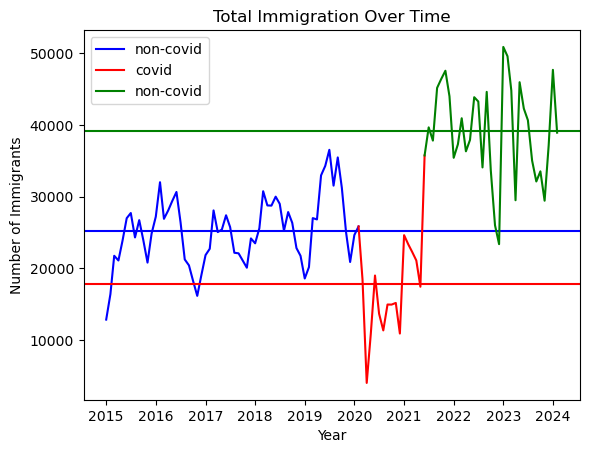

In [36]:
plt.title("Total Immigration Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

# pre-covid
mean_total_pre_covid = df_total_pre_covid.mean(axis=1).mean()
plt.axhline(mean_total_pre_covid, color="b")
plt.plot(df_total_pre_covid, label="non-covid", color="b")

# during covid
mean_total_during_covid = df_total_during_covid.mean(axis=1).mean()
plt.axhline(mean_total_during_covid, color="r")
plt.plot(df_total_during_covid, label="covid", color="r")

# post-covid
mean_total_post_covid = df_total_post_covid.mean(axis=1).mean()
plt.axhline(mean_total_post_covid, color="g")
plt.plot(df_total_post_covid, color="g", label="non-covid")

plt.legend()
plt.show()

<b>Comments</b>
<br>
<p> The plot displays a clear trend difference between pre-covid, during covid and post-covid, it is also quite clear when the waves of covid have occured and when Canada removed their travel restrictions even though the pandemic was not officially over as seen by the sharp rise at the end of the covid phase </p>

### Total immigrants over time per continent

In [37]:
px.line(df_grouped_by_continent, title="total immigration by continent")

<b>Comments</b>
<br>
It seams like Asia has a much larger ammounts of immigrants, let's see why

### top 10 countries with most immigrants

In [38]:
top_10_imm = df_can_total_country.copy().nlargest(10, columns=["Total"])
fig = px.bar(top_10_imm)
fig.update_yaxes(title_text="Immigrants")

fig.show()

<b>Comments</b>
<br>
Here we clearly see that India has a massive effect on the total immigrants

### Total immigrants without India

In [39]:
India_values = df_can["India"].values
df_India = df_can["India"]

df_grouped_by_continent_without_India = df_grouped_by_continent.copy()
df_grouped_by_continent_without_India["Asia"] = (
    df_grouped_by_continent_without_India["Asia"] - df_India
)

px.line(
    df_grouped_by_continent_without_India,
    title="total immigration by continent without India",
)

<b>Comments</b>
<br>
Even though it is reduced, Asia is still on top

In [40]:
fig = px.line(df_grouped_by_continent, title="total immigration by continent")
fig.add_trace(
    go.Scatter(
        x=df_India.index,
        y=df_India.values,
        mode="lines",
        name="India",
        line=dict(color="red", dash="longdashdot", width=4),
    )
)

fig.show()

<b>Comments</b>
<br>
Here we can see that India has even more immigrants than some continents!

### Total immigration to Canada per continent

In [41]:
px.bar(df_total_by_continent)

### Here we have the average immigration during a year per covid period

In [42]:
df_by_month_pre_covid = df_total_pre_covid.groupby(
    df_total_pre_covid.index.month
).mean()
df_by_month_pre_covid.index = df_by_month_pre_covid.index.map(month_dict)

df_by_month_during_covid = df_total_during_covid.groupby(
    df_total_during_covid.index.month
).mean()
df_by_month_during_covid.index = df_by_month_during_covid.index.map(month_dict)

df_by_month_post_covid = df_total_post_covid.groupby(
    df_total_post_covid.index.month
).mean()
df_by_month_post_covid.index = df_by_month_post_covid.index.map(month_dict)

fig1 = px.bar(df_by_month_post_covid, title="POST COVID")
fig2 = px.bar(df_by_month_pre_covid, title="PRE COVID")
fig3 = px.bar(df_by_month_during_covid, title="DURING COVID")

# logarithmic y-value for a better reading
fig1.update_layout(yaxis_type="log")
fig2.update_layout(yaxis_type="log")
fig3.update_layout(yaxis_type="log")

display(fig2, fig3, fig1)

<b>Comments</b>
<br>
- The first polt shows the human tendency to immigrate during summer pre covid, which follows pretty much a gaussian distribution.
- The second plot shows the more "chaotic" trend of immigrants during covid
- The third plot shows the even more "chaotic" trend of immigrants after covid

<h2 style="text-align: center;">Hypothesis Testing</h2> 
<h3>Objective</h3>
<p> To conduct hypothesis testing to evaluate the impact of the COVID-19 pandemic on immigration trends</p>

<h3> Hypothesis 1: </h3>

<h4> <b> Objective: </b></h4>
<p>To determine if the mean total immigration for a specific year (2021) is significantly different from a hypothesized population mean (2023). </p>

<h4><b>Hypothesized Mean for 2023: </b></h4>

- Total Annual Immigration for 2023: <b>500,000</b>
- Mean Monthly Immigration for 2023: <b>500,000/12 = 41666.67</b>


-  <p> <b>H0:</b> μ = 41667</p>

- <p><b>H1:</b> μ ≠ 41667</p>


In [43]:
# Extract data for 2021
df_2021 = df_can.loc["2021"]

# Known or hypothesized mean for 2023 (based on monthly data)
hypothesized_mean_2023 = 41667

# Calculate the mean and standard deviation for 2021
mean_2021 = df_2021.sum(axis=1).mean()
std_2021 = df_2021.sum(axis=1).std()

# Perform t-test
t_stat, p_value = stats.ttest_1samp(
    df_2021.sum(axis=1).dropna(), hypothesized_mean_2023
)

# Results
print("The mean for 2021 is:", mean_2021)
print("The standard deviation for 2021 is:", std_2021)
print("The T-statistic is:", t_stat)
print("The P-value  is:", p_value)

# Interpretation
if p_value < 0.05:
    conclusion = "The null hypothesis is rejected"
else:
    conclusion = "Failed to reject the null hypothesis"

# mean_2021, std_2021, t_stat, p_value,
conclusion

The mean for 2021 is: 33764.583333333336
The standard deviation for 2021 is: 11253.599314791636
The T-statistic is: -2.432535011488309
The P-value  is: 0.03325993478637383


'The null hypothesis is rejected'

<h4> <b>Interpretation:</b> </h4>

- Since P-value (0.033) < significance level (alpha = 0.05), therefore we reject the null hypothesis.

- There's enough evidence to suggest a significant difference in mean total immigration between the two years.

<h4> <b>Conclusion: </b></h4>

- There is a significant difference between the mean total immigration for 2021 and 2023. The immigration patterns observed in 2021 are not consistent with the hypothesized mean immigration pattern for 2023.

- This conclusion suggests that external factors, like the COVID-19 pandemic, which impacted immigration trends significantly in 2021 compared to the patterns anticipated for 2023.

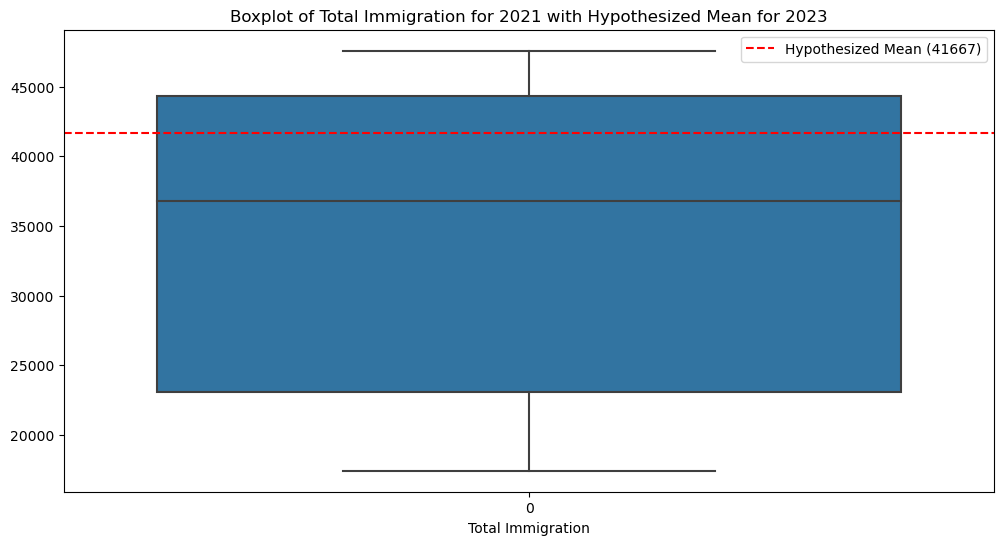

In [44]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2021.sum(axis=1).dropna())  # Plotting the data for 2021
plt.axhline(
    y=hypothesized_mean_2023,
    color="r",
    linestyle="--",
    label=f"Hypothesized Mean ({hypothesized_mean_2023})",
)
plt.legend()
plt.title("Boxplot of Total Immigration for 2021 with Hypothesized Mean for 2023")
plt.xlabel("Total Immigration")
plt.show()

<b>Interpretation of Box plot</b>
<br>
Since the median and the majority of the data points are below the hypothesized mean, it suggests that the immigration levels in 2021 are significantly different from the hypothesized mean for 2023, as supported by the hypothesis testing results.

<h3> Hypothesis 2: </h3>
<h4> Objective: </h4>
To assess whether there is a significant difference in the mean immigration levels before and after the first COVID-19 wave 

- <b>H0</b>: μ(pre_covid) = μ(post_covid)
- <b>H1 </b>: μ(pre_covid) ≠ μ(post_covid)

For this hypothesis, we use a t-test for independent samples.

In [45]:
from scipy.stats import ttest_ind

# Select data for pre-covid and post-covid periods
data_pre_covid = df_total_pre_covid["Total"]
data_post_covid = df_total_post_covid["Total"]

# Perform the t-test
t_stat, p_value = ttest_ind(data_pre_covid, data_post_covid)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -11.64231858037166
P-value: 7.400996721128913e-20


<h4> <b>Interpretation: </b></h4>


- Since P-value (7.40×10^-20) < significance level (alpha = 0.05), we reject the null hypothesis.

- Since t-statistic (-11.64) represents the degree of difference between the mean immigration levels before and after the first COVID-19 wave, a negative t-statistic indicates that the mean immigration levels after the first COVID-19 wave are lower compared to those before the wave.

<h4> <b> Conclusion: </b> </h4>

- Given the large t-statistic (-11.64) and the small p-value, there is a significant difference in mean immigration levels between the periods before and after the first COVID-19 wave.

- Therefore, it can be concluded that the onset of the COVID-19 pandemic has had a substantial impact on immigration patterns, leading to a notable shift in immigration levels in the period following the initial wave.

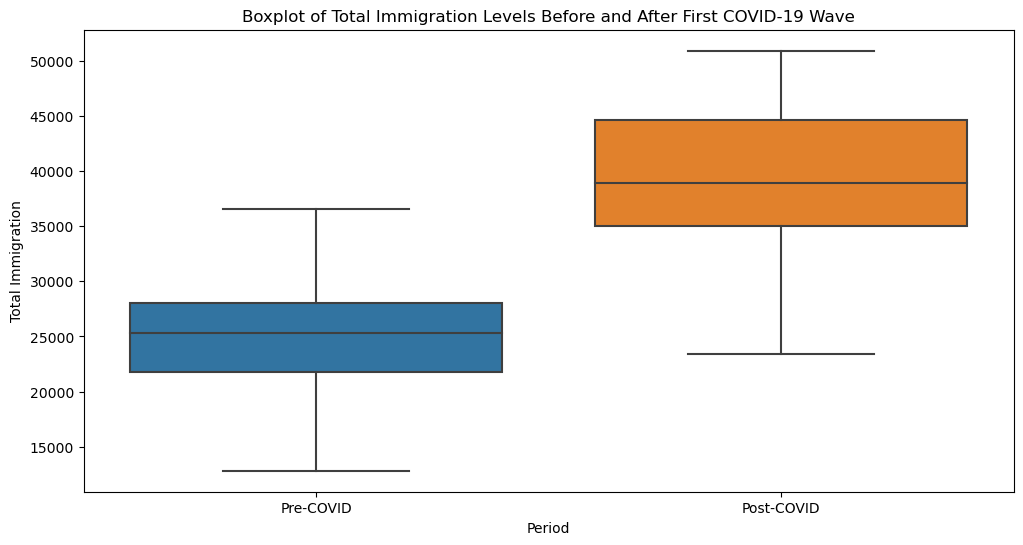

In [46]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot box plots for pre-covid and post-covid data
sns.boxplot(data=[data_pre_covid, data_post_covid], ax=ax)

# Set labels and title
ax.set_xlabel("Period")
ax.set_ylabel("Total Immigration")
ax.set_xticklabels(["Pre-COVID", "Post-COVID"])
ax.set_title("Boxplot of Total Immigration Levels Before and After First COVID-19 Wave")

# Show the plot
plt.show()

<b>Interpretation of Box plot</b>
<br>
- The median and the interquartile range (IQR) of the pre-COVID box are notably higher than those of the post-COVID box, indicating a higher difference in immigration levels before the pandemic compared to after the first wave.
- The significant difference in the median values between the two periods further supports the hypothesis testing results, indicating a huge impact of the COVID-19 pandemic on immigration patterns.

### Hypothesis 3:
#### Objective: 
To investigate whether there is a significant difference in the number of fatalities between the two-year periods before and after the start of the COVID-19 pandemic.

- <b> H0: </b>μ(pre_covid) = μ(post_covid)
- <b>H1:</b> μ(pre_covid) ≠ μ(post_covid)
For this hypothesis, we'll again use a t-test for independent samples.


In [47]:
# Select data for two years before COVID-19
data_pre_covid = df_fatalities.loc["2018-01-01":"2019-12-31"]

# Select data for two years after COVID-19
data_post_covid = df_fatalities.loc["2020-01-01":"2021-12-31"]

# Calculate the average number of fatalities for each period
avg_pre_covid = data_pre_covid.mean().mean()
avg_post_covid = data_post_covid.mean().mean()

# Perform the paired t-test
t_stat, p_value = ttest_rel(
    data_pre_covid.values.flatten(), data_post_covid.values.flatten()
)

# Print the results
print("Avg number of fatalities 2 years before COVID-19:", avg_pre_covid)
print("Avg number of fatalities 2 years after COVID-19:", avg_post_covid)
print("T-statistic:", t_stat)
print("P-value:", p_value)

Avg number of fatalities 2 years before COVID-19: 69.86168384879724
Avg number of fatalities 2 years after COVID-19: 62.24785223367699
T-statistic: 2.0716709529930153
P-value: 0.038351090906653576


<h4><b> Interpretation: </h4> </b>

- Since <b>P-value</b> (0.0384) < significance level (alpha = 0.05),we reject the null hypothesis.
- <b>Average Number of Fatalities</b>: The average number of fatalities two years before COVID-19 (69.86) is slightly higher than the average number of fatalities two years after COVID-19 (62.25).
- <b>T-statistic</b>: The calculated t-statistic of 2.07 indicates the magnitude of the difference between the mean number of fatalities before and after the COVID-19 pandemic.

<h4><b> Conclusion: </b> </h4>

- Based on the results, there is a significant difference in the average number of fatalities between the two-year periods before and after the onset of the COVID-19 pandemic.

- Therefore, it can be concluded that the COVID-19 pandemic has had an impact on fatality rates due to organized violence, leading to a noticeable change in mortality patterns in the two-year period following the pandemic's onset.

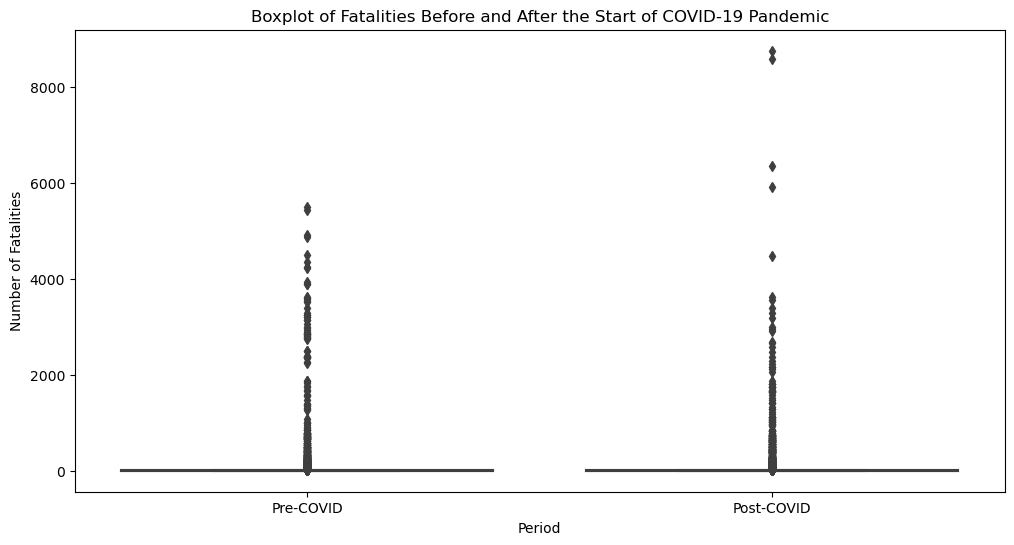

In [48]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot box plots for pre-covid and post-covid data
sns.boxplot(data=[data_pre_covid.values.flatten(), data_post_covid.values.flatten()], ax=ax)

# Set labels and title
ax.set_xlabel("Period")
ax.set_ylabel("Number of Fatalities")
ax.set_xticklabels(["Pre-COVID", "Post-COVID"])
ax.set_title("Boxplot of Fatalities Before and After the Start of COVID-19 Pandemic")

plt.show()

<b>Interpretation of Box plot</b>
<br>
- The median and the interquartile range (IQR) of the pre-COVID box are slightly higher than those of the post-COVID box, indicating a higher fatalities before the pandemic compared to after the start of the pandemic. 
- The difference in the median values between the two periods is supported by the hypothesis testing results, indicating a significant impact of the COVID-19 pandemic on fatality rates due to organized violence.

<h2 style="text-align: center;">Confidence Intervals</h2> 

In this analysis, confidence intervals help us understand the variability and reliability of the immigration data over  selected periods of time.

<p> <b> Population:</b> In our analysis, the population consists of all immigrants to Canada from 2015-2024</p>
<p><b>Sample:</b> We analysed immigration data from specific years as samples (these specific years are the Pre-covid, During-Covid, Post-Covid years) </p>


### Pre-COVID 

In [49]:
# Calculate the Mean and Standard Deviation
mean_pre_covid = df_total_pre_covid.mean(axis=1).mean()
std_pre_covid = df_total_pre_covid.mean(axis=1).std()

# Calculate the Margin of Error = Z * (σ / √n)
n_pre_covid = df_total_pre_covid.shape[0]
z_score = stats.norm.ppf(0.975)  # 95% confidence level
margin_of_error_pre_covid = z_score * (std_pre_covid / np.sqrt(n_pre_covid))

# Calculate the Confidence Interval= Mean ± Margin of Error
ci_lower_pre_covid = mean_pre_covid - margin_of_error_pre_covid
ci_upper_pre_covid = mean_pre_covid + margin_of_error_pre_covid

print(f"95% CI for Pre-COVID Period: ({ci_lower_pre_covid}, {ci_upper_pre_covid})")

95% CI for Pre-COVID Period: (24040.62091163736, 26406.31457223361)


<b>Interpretation</b>
<p> The interval (24,040 to 26,406) suggests that we are 95% confident the true mean number of immigrants per year lies within this range.</p>

<b>Analysis</b>
<p>The pre-COVID period represents a stable immigration pattern with a moderate number of immigrants. The narrower range indicates a consistent immigration trend during these years, without significant fluctuations.</p>

### During-COVID

In [50]:
# Calculate the Mean and Standard Deviation
mean_during_covid = df_total_during_covid.mean(axis=1).mean()
std_during_covid = df_total_during_covid.mean(axis=1).std()

# Calculate the Margin of Error = Z * (σ / √n)
n_during_covid = df_total_during_covid.shape[0]
margin_of_error_during_covid = z_score * (std_during_covid / np.sqrt(n_during_covid))

# Calculate the Confidence Interval= Mean ± Margin of Error
ci_lower_during_covid = mean_during_covid - margin_of_error_during_covid
ci_upper_during_covid = mean_during_covid + margin_of_error_during_covid

print(
    f"95% CI for During-COVID Period: ({ci_lower_during_covid}, {ci_upper_during_covid})"
)

95% CI for During-COVID Period: (14352.786952712755, 21350.154223757832)


<b>Interpretation</b>
<p> The interval (14,353 to 21,350) reflects a significant decrease in immigration due to the pandemic.</p>

<b>Analysis</b> 
<p>The during-COVID period shows a significant decrease in immigration. The wider range reflects the higher uncertainty and variability in immigration numbers due to the pandemic's disruptions, travel restrictions, and other global uncertainties.</p>

### Post-COVID

In [51]:
# Calculate the Mean and Standard Deviation
mean_post_covid = df_total_post_covid.mean(axis=1).mean()
std_post_covid = df_total_post_covid.mean(axis=1).std()

# Calculate the Margin of Error = Z * (σ / √n)
n_post_covid = df_total_post_covid.shape[0]
margin_of_error_post_covid = z_score * (std_post_covid / np.sqrt(n_post_covid))

# Calculate the Confidence Interval= Mean ± Margin of Error
ci_lower_post_covid = mean_post_covid - margin_of_error_post_covid
ci_upper_post_covid = mean_post_covid + margin_of_error_post_covid

print(f"95% CI for Post-COVID Period: ({ci_lower_post_covid}, {ci_upper_post_covid})")

95% CI for Post-COVID Period: (36800.94568296287, 41433.90280188561)


<b>Interpretation</b>
<p>The interval (36,801 to 41,434) indicates a substantial recovery and increase in immigration post-COVID.</p>

<b>Analysis</b>
<p>The during-COVID period shows a significant decrease in immigration. The wider range reflects the higher uncertainty and variability in immigration numbers due to the pandemic's disruptions, travel restrictions, and other global uncertainties.</p>

<h2 style="text-align: center;">Linear Regression and Correlation Analysis</h2> 

### Bar plot with fatalities and immigrants


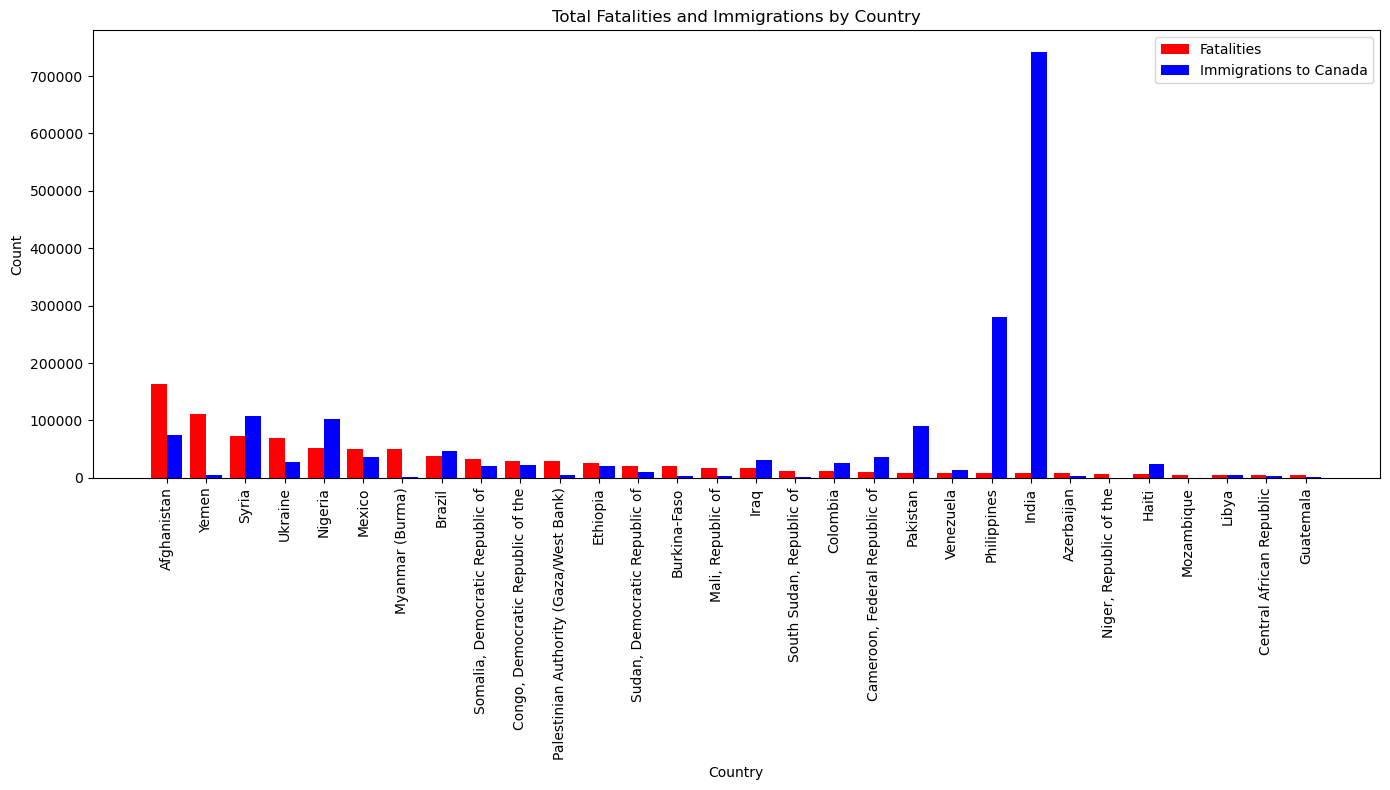

In [52]:
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.4
index = np.arange(len(top_30_fat))

bars1 = ax.bar(
    index - bar_width / 2,
    top_30_fat["Total Fatalities (2018-01 until 2024-02)"],
    bar_width,
    label="Fatalities",
    color="r",
)

# Plot bars for immigrations
bars2 = ax.bar(
    index + bar_width / 2,
    top_30_fat["country_imm"],
    bar_width,
    label="Immigrations to Canada",
    color="b",
)

ax.set_xlabel("Country")
ax.set_ylabel("Count")
ax.set_title("Total Fatalities and Immigrations by Country")
ax.set_xticks(index)
ax.set_xticklabels(top_30_fat.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

<b>Comments</b>
<br>
It is not clear the corelation between fatalities and immigrants especially with outliers like India

### Bar plot fatalities vs immigrants without outliers


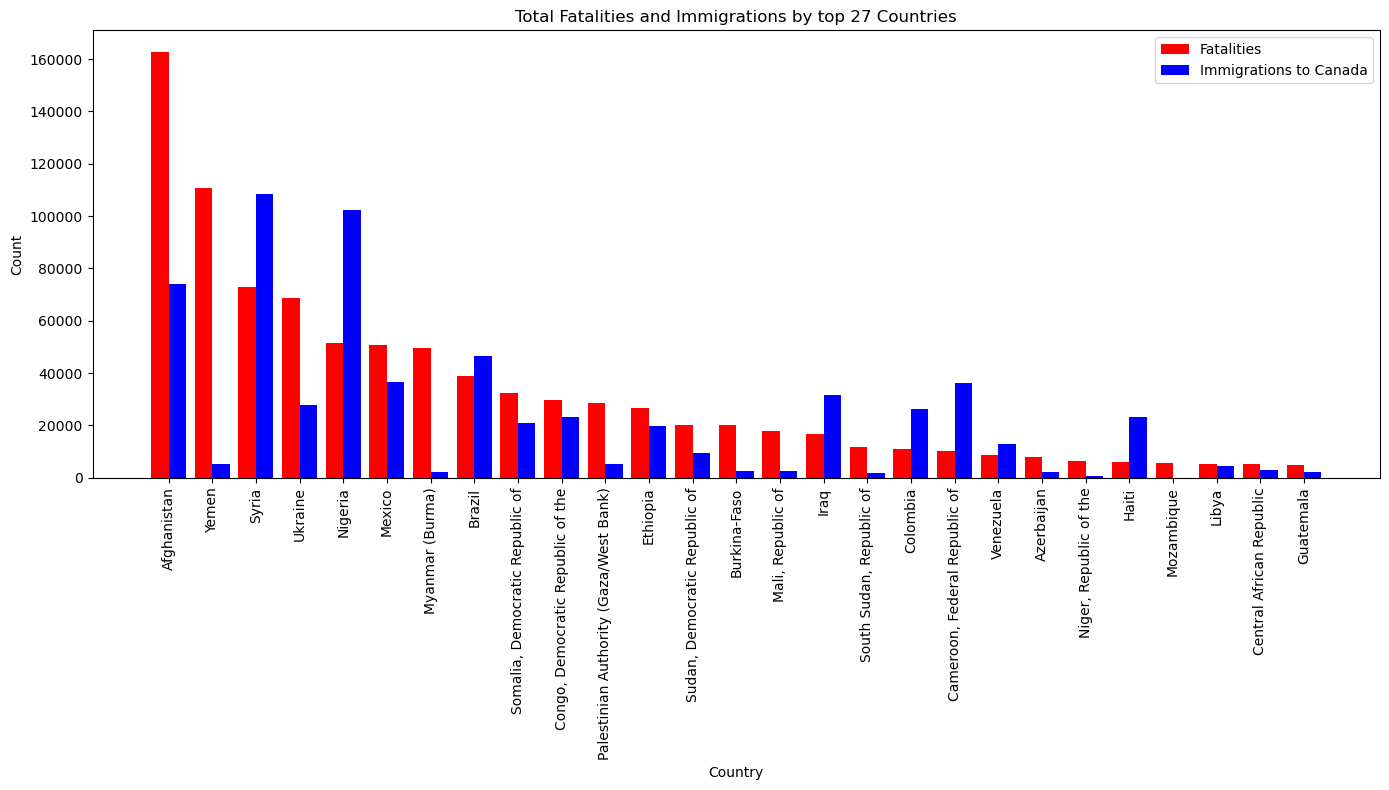

In [53]:
top_30_fat = top_30_fat.copy().T

top_30_fat = top_30_fat.drop(columns=["India", "Philippines", "Pakistan"])

top_30_fat = top_30_fat.T

fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.4
index = np.arange(len(top_30_fat))

bars1 = ax.bar(
    index - bar_width / 2,
    top_30_fat["Total Fatalities (2018-01 until 2024-02)"],
    bar_width,
    label="Fatalities",
    color="r",
)

# Plot bars for immigrations
bars2 = ax.bar(
    index + bar_width / 2,
    top_30_fat["country_imm"],
    bar_width,
    label="Immigrations to Canada",
    color="b",
)

ax.set_xlabel("Country")
ax.set_ylabel("Count")
ax.set_title("Total Fatalities and Immigrations by top 27 Countries")
ax.set_xticks(index)
ax.set_xticklabels(top_30_fat.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

<b>Comments</b>
<br>
It seems that without the outliers the corelation has some similarities

### corelation between immigrants and fatalities

In [54]:
y = top_30_fat["country_imm"].values
y = y.astype(int)
x = top_30_fat["Total Fatalities (2018-01 until 2024-02)"].values
x = x.astype(int)
mod = sm.OLS(y, x)

fitted_mod = mod.fit()
print(f"R^2: {fitted_mod.rsquared}")

R^2: 13.12715179453944


<b>Comments</b>
<br>
if we take the total countries immigration and fatalities, there is somewhat of a corelation but not us much as we hoped

### Finding the country with the best corelation


In [55]:
max_r = 0
for country in top_30_fat.index:
    y = df_fatalities[country].copy().fillna(0).values
    y = y.astype(int)

    x = df_can[country]["2018-01":].copy().fillna(0).values
    x = x.astype(int)

    mod = sm.OLS(y, x)
    fitted_mod = mod.fit()

    if max_r < fitted_mod.rsquared:
        max_r = fitted_mod.rsquared
        max_r_country = country

print(f"The best corelation is (R^2): {max_r}, with the country being: {max_r_country}")

The best corelation is (R^2): 0.8271474666921436, with the country being: Colombia


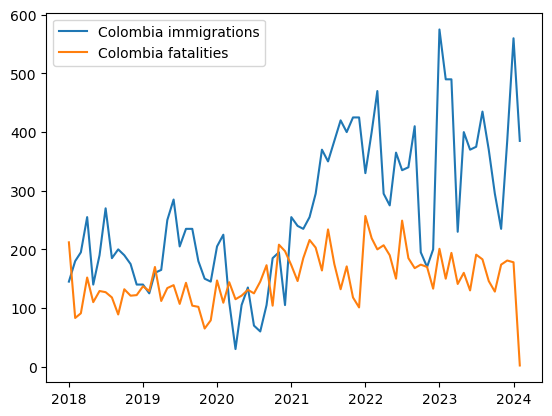

In [56]:
# Colombia

plt.plot(df_can["Colombia"]["2018-01":], label="Colombia immigrations")
plt.plot(df_fatalities["Colombia"], label="Colombia fatalities")
plt.legend()

So the best country with the best corelation between fatalities and immigrants to Canada is Colombia.

That is pretty helpful but what about for a broader group of people.

### Multy linear regression
Coming back to the total fatalities and canadian immigration numbers

<Axes: >

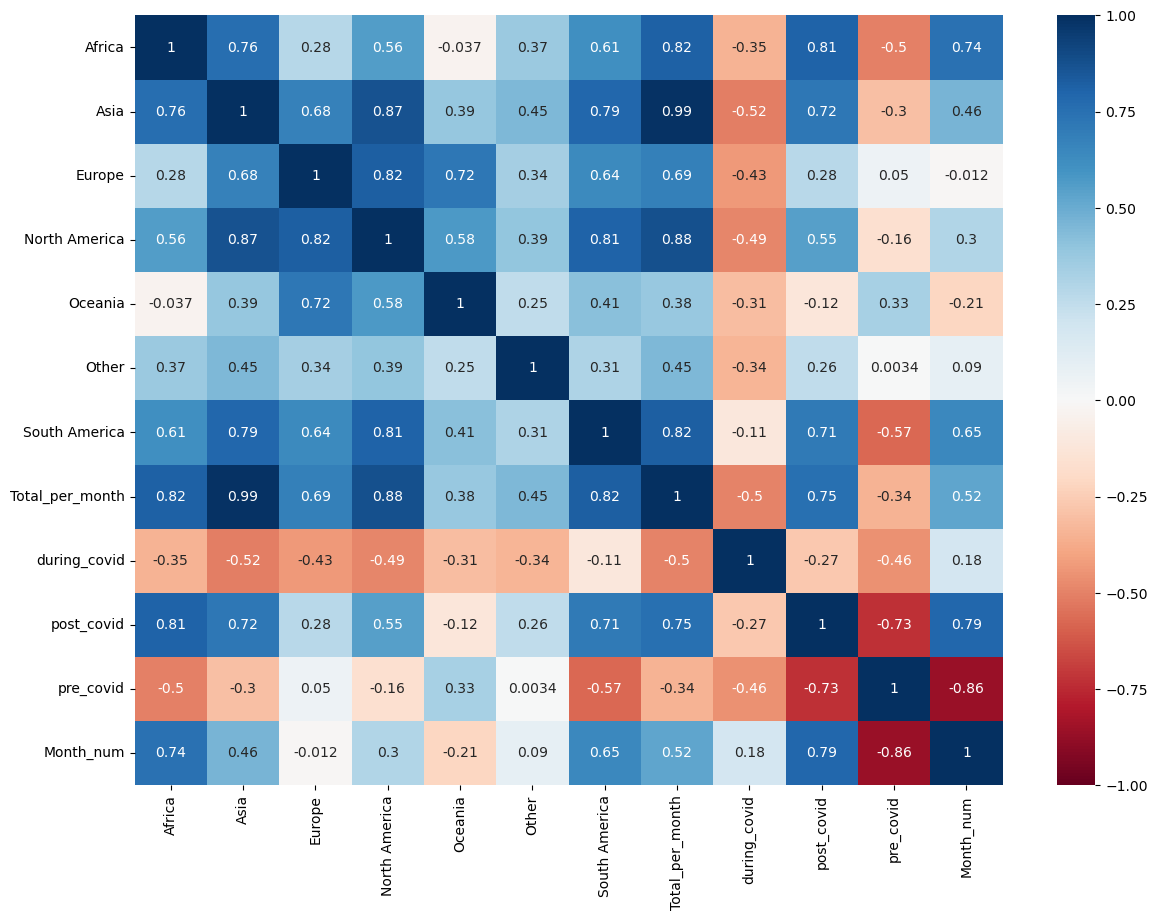

In [57]:
# corelation of all the different variables
corelation_matrix = df_for_reg.corr()
corelation_matrix

plt.figure(figsize=(14, 10))
sns.heatmap(corelation_matrix, cmap="RdBu", vmin=-1, vmax=1, annot=True)

<b>Comments</b>
<br>
Asia has a very good corelation with total immigrants per month because it is a determinant variable to total immigrants

### The first linear regression is simply the relation between total immigrants over time

In [58]:
expl_var = [
    c
    for c in df_for_reg.columns
    if c
    not in [
        "Total_per_month",
        "Asia",
        "Africa",
        "Europe",
        "North America",
        "Oceania",
        "South America",
        "Other",
    ]
]

y = df_for_reg[
    "Total_per_month"
]  # variable to find the regression for (have to remove the var from expl_var, and time-stamp)
y = y.astype(float)
x = df_for_reg[expl_var].copy()
x["intercept"] = 1
mod = sm.OLS(y, x)

fitted_mod = mod.fit()
print(fitted_mod.summary())

                            OLS Regression Results                            
Dep. Variable:        Total_per_month   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     72.75
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           1.25e-25
Time:                        11:19:00   Log-Likelihood:                -1102.3
No. Observations:                 110   AIC:                             2213.
Df Residuals:                     106   BIC:                             2223.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
during_covid -5064.7772   1325.472     -3.821   

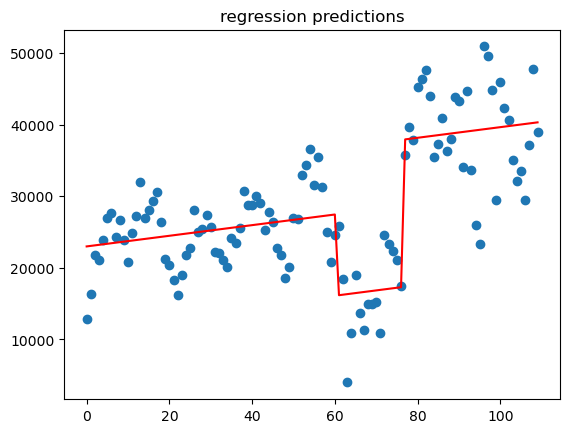

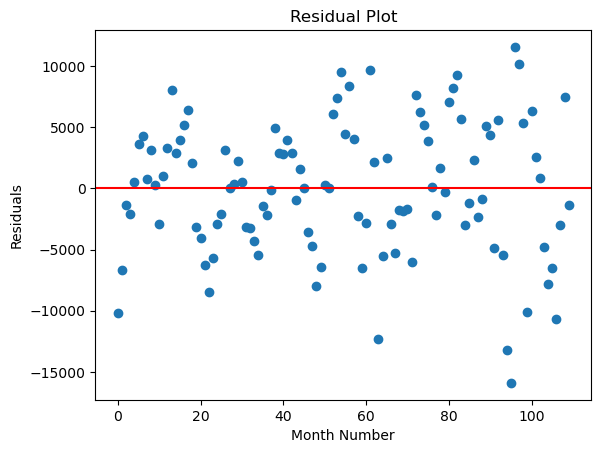

<Axes: >

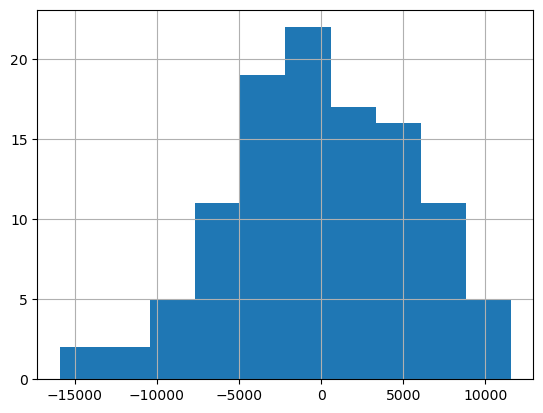

In [59]:
predictions = fitted_mod.predict(x)

# regression with covid period and time
plt.scatter(x=df_for_reg["Month_num"], y=df_for_reg["Total_per_month"])
plt.plot(
    df_for_reg["Month_num"],
    predictions,
    color="red",
    linestyle="-",
    label="Regression Line",
)
plt.title("regression predictions")
plt.show()

residuals = y - predictions
plt.scatter(x["Month_num"], residuals)
plt.axhline(y=0, color="red", linestyle="-")
plt.xlabel("Month Number")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

residuals.hist()

Instead of just having the constant time as an explanatory variable, we added also the covid period

### Here we apply it to the graph


C:\Users\William\AppData\Local\Temp\ipykernel_4072\1019952123.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\William\AppData\Local\Temp\ipykernel_4072\1019952123.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\William\AppData\Local\Temp\ipykernel_4072\1019952123.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

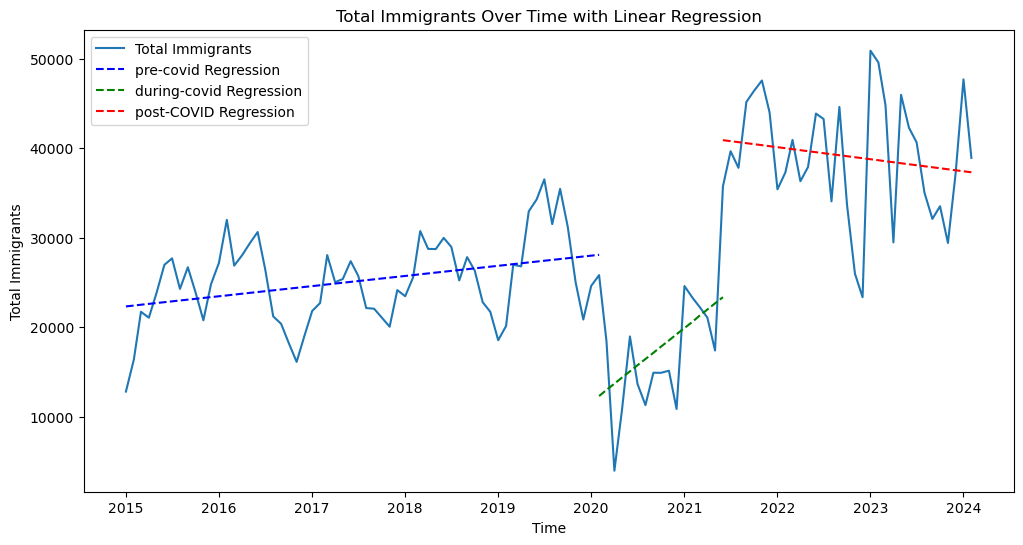

In [60]:
# total number of immigrants over time for each covid period

df_total = df_grouped_total.copy()
df_total["Time"] = np.arange(len(df_total))

# Define periods
pre_covid_end = pd.to_datetime("2020-02-01")
during_covid_end = pd.to_datetime("2021-06-01")

# Subset the data for each period
df_pre_covid = df_total.loc[:pre_covid_end]
df_during_covid = df_total.loc[pre_covid_end:during_covid_end]
df_post_covid = df_total.loc[during_covid_end:]

# Define X and y for each period
x_pre_covid = df_pre_covid["Time"].values.reshape(-1, 1)
y_pre_covid = df_pre_covid["Total"].values

x_during_covid = df_during_covid["Time"].values.reshape(-1, 1)
y_during_covid = df_during_covid["Total"].values

x_post_covid = df_post_covid["Time"].values.reshape(-1, 1)
y_post_covid = df_post_covid["Total"].values

# Fit linear regression models for each period
model_pre_covid = LinearRegression()
model_pre_covid.fit(x_pre_covid, y_pre_covid)

model_during_covid = LinearRegression()
model_during_covid.fit(x_during_covid, y_during_covid)

model_post_covid = LinearRegression()
model_post_covid.fit(x_post_covid, y_post_covid)

# Predictions for each period
df_pre_covid["Predicted"] = model_pre_covid.predict(x_pre_covid)
df_during_covid["Predicted"] = model_during_covid.predict(x_during_covid)
df_post_covid["Predicted"] = model_post_covid.predict(x_post_covid)

# Plot total immigrants over time and the regression lines for each period
plt.figure(figsize=(12, 6))
plt.plot(df_total.index, df_total["Total"], label="Total Immigrants")

plt.plot(
    df_pre_covid.index,
    df_pre_covid["Predicted"],
    color="blue",
    linestyle="--",
    label="pre-covid Regression",
)
plt.plot(
    df_during_covid.index,
    df_during_covid["Predicted"],
    color="green",
    linestyle="--",
    label="during-covid Regression",
)
plt.plot(
    df_post_covid.index,
    df_post_covid["Predicted"],
    color="red",
    linestyle="--",
    label="post-COVID Regression",
)

plt.xlabel("Time")
plt.ylabel("Total Immigrants")
plt.title("Total Immigrants Over Time with Linear Regression")
plt.legend()
plt.show()

<b>Comments</b>
<br>
we can see that pre covid the immigrations are increasingly, during covid it increases pretty repidly, but post covid it is slowly decreasing

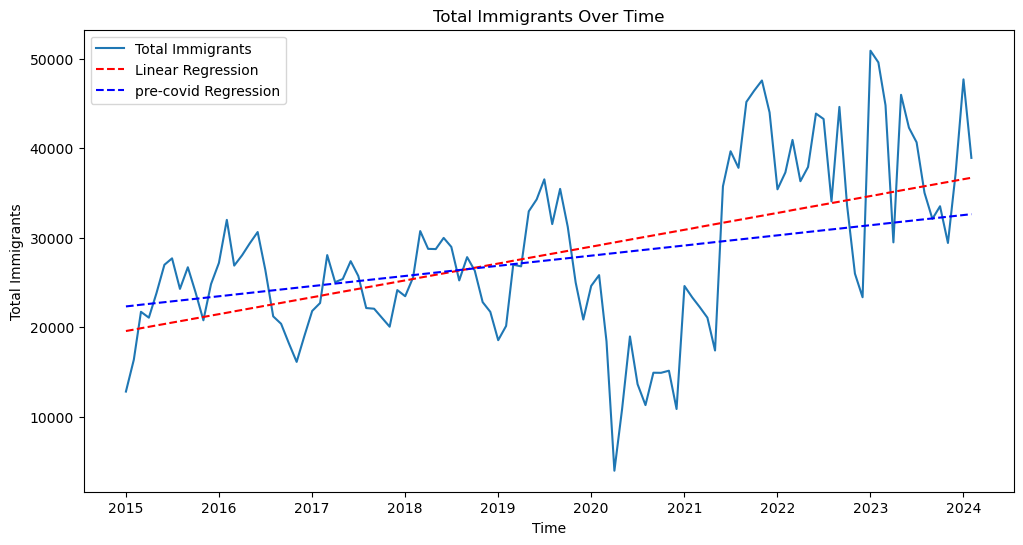

In [61]:
# here is an interesting regerssion of the number of immigrants if covid never happen

df_total = df_grouped_total.copy()

df_total["Time"] = np.arange(len(df_total))
x = df_total["Time"].values.reshape(-1, 1)
y = df_total["Total"].values

model = LinearRegression()
model.fit(x, y)

df_total["Predicted_pre_covid"] = model_pre_covid.predict(x)
df_total["Predicted"] = model.predict(x)

plt.figure(figsize=(12, 6))
plt.plot(df_total.index, df_total["Total"], label="Total Immigrants")
plt.plot(
    df_total.index,
    df_total["Predicted"],
    color="red",
    linestyle="--",
    label="Linear Regression",
)
plt.plot(
    df_total.index,
    df_total["Predicted_pre_covid"],
    color="blue",
    linestyle="--",
    label="pre-covid Regression",
)
plt.xlabel("Time")
plt.ylabel("Total Immigrants")
plt.title("Total Immigrants Over Time")
plt.legend()
plt.show()

<b>Comments</b>
<br>
It is intersting to see how covid actually, on average, increased the number of immigrants to Canada

### Formula to find total immigrants

In [62]:
# Get coefficients and intercept from the model
total_coef = model.coef_[0]
total_intercept = model.intercept_

print(f"Total_immigrants = {total_coef} * Time + {total_intercept}")

Total_immigrants = 157.03877104794535 * Time + 19592.432432432433


### Corelation matrix immigrants and fatalities


Axes(0.125,0.11;0.62x0.77)


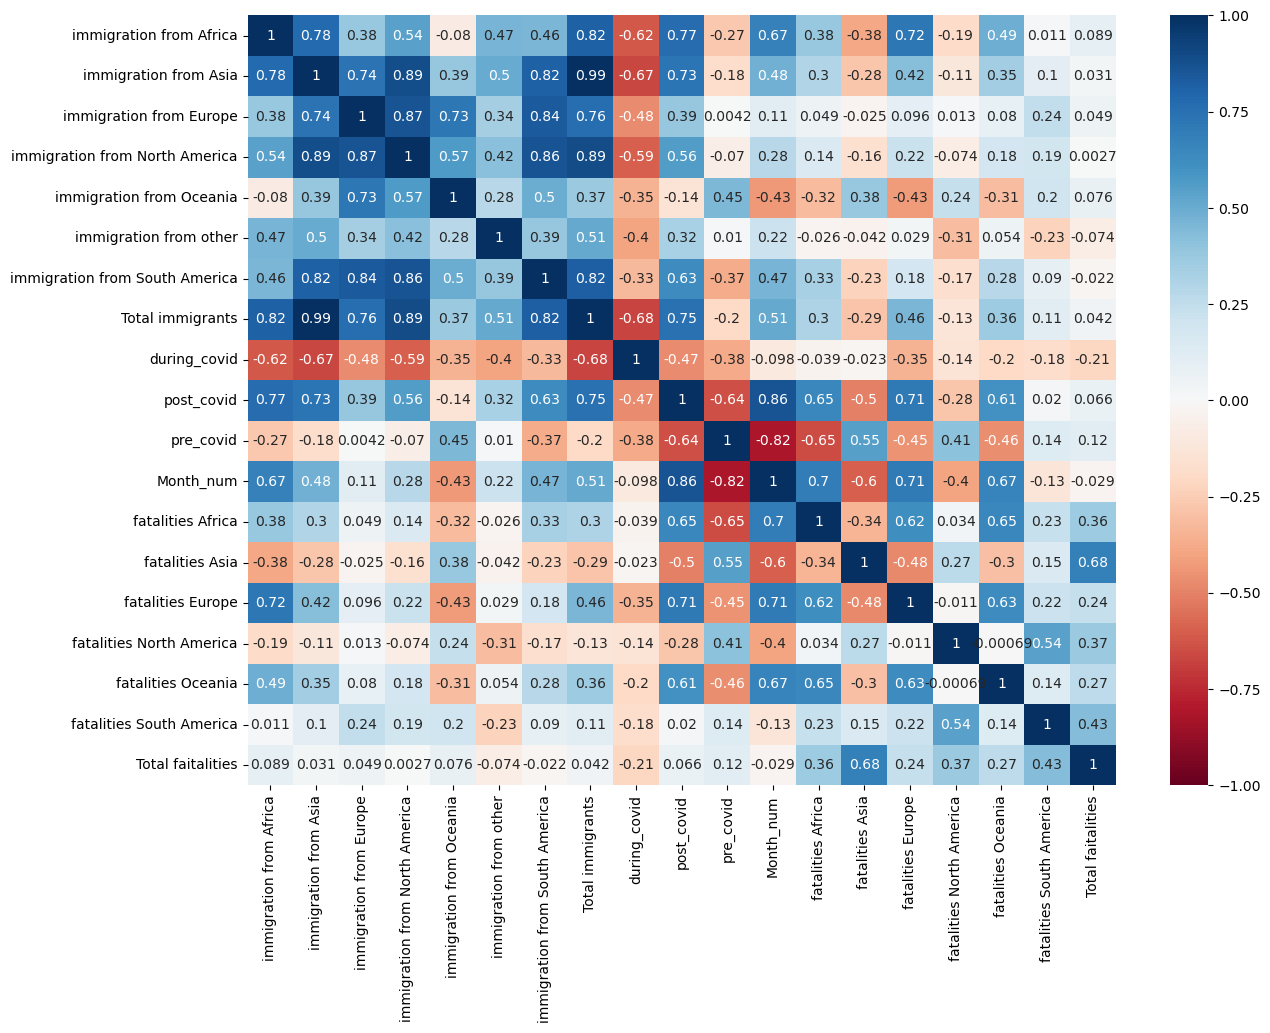

In [63]:
corelation_matrix = df_reg_can_fat.corr()
plt.figure(figsize=(14, 10))
print(sns.heatmap(corelation_matrix, cmap="RdBu", vmin=-1, vmax=1, annot=True))

### We compare North American fatalities due to immigrations

In [64]:
# linear regression of total immigrants with all these infromations gives a decent value but it could be better

expl_var = [
    c
    for c in df_reg_can_fat.columns
    if c
    not in [
        "Total immigrants",
        'immigration from Africa',
        'immigration from Asia',
        "immigration from Europe",
        #"immigration from North America",
        #"immigration from Oceania",
        #"immigration from other",
        "immigration from South America",
        #"during_covid",
        "post_covid",
        "pre_covid",
        #'Month_num',
        "fatalities Africa",
        "fatalities Asia",
        "fatalities Europe",
        "fatalities North America",
        "fatalities Oceania",
        "fatalities South America",
        "Total faitalities",
    ]
]

reg_res_var = "fatalities North America"  # variable to find the regression for (have to remove the var from expl_var)
y = df_reg_can_fat[reg_res_var]
y = y.astype(float)
x = df_reg_can_fat[expl_var].copy()
x["intercept"] = 1
mod = sm.OLS(y, x)

fitted_mod = mod.fit()
print(fitted_mod.summary())

                               OLS Regression Results                               
Dep. Variable:     fatalities North America   R-squared:                       0.322
Model:                                  OLS   Adj. R-squared:                  0.272
Method:                       Least Squares   F-statistic:                     6.448
Date:                      Wed, 05 Jun 2024   Prob (F-statistic):           5.85e-05
Time:                              11:19:01   Log-Likelihood:                -471.06
No. Observations:                        74   AIC:                             954.1
Df Residuals:                            68   BIC:                             968.0
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

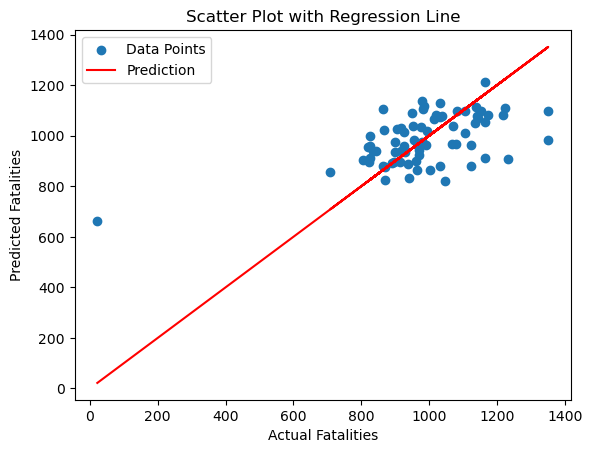

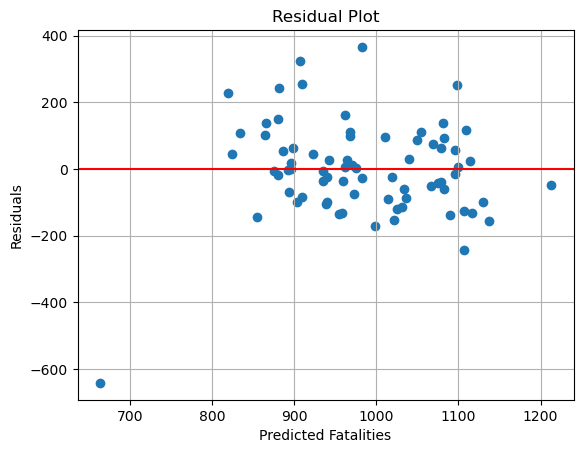

<Axes: >

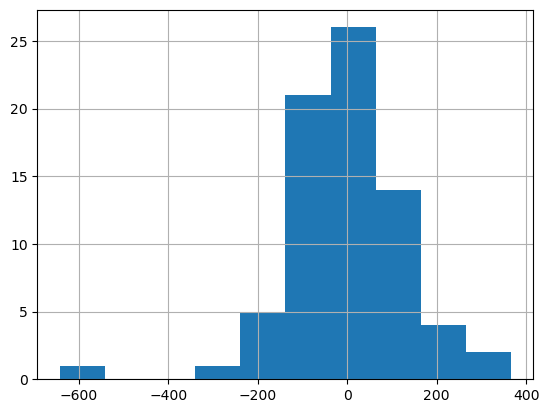

In [65]:
predictions = fitted_mod.predict(x)

# Plot the scatter plot and regression line
plt.scatter(y, predictions, label="Data Points")
plt.plot(
    y, y, color="red", label="Prediction"
)  # Plotting the perfect prediction line (y = x)
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Scatter Plot with Regression Line")
plt.legend()
plt.show()

residuals = y - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color="red", linestyle="-")
plt.xlabel("Predicted Fatalities")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

residuals.hist()

We found that there is a decent corelation between fatalites in north America with explanatory variables of: immigrants (to Canada) from North America, immigrants from Oceania, immigrants from other continents, the month number, and that its during covid.

But even though the R^2 is fine and even the distribution of the values follows a normal one, the model is not perfect to describe the fatalities in North America shown by the outliers.

In [66]:
# R^2 of 0.69 for the total immigration without taking in account immigration from various continents when:

coeficients = fitted_mod.params
i = 0
repr = f"{reg_res_var} = "
for coef in coeficients.index:
    if coef == coeficients.index[-1]:
        repr += str(coeficients[coef])
        print(repr)
    else:
        repr += f"{coeficients[coef]} * {coeficients.index[i]} + "
        i += 1

fatalities North America = -0.050763417029612706 * immigration from North America + 0.6402819182447768 * immigration from Oceania + -1.9654919147032908 * immigration from other + -144.05756441162492 * during_covid + -1.3792984993053308 * Month_num + 1257.3540505337714


### Model Prediction

In [68]:

x0 = np.array([100., 100., 100, 1., 2., 1])  # 3 features + 1 intercept
x0 = x0.reshape(1, -1)

# prediction
y_pred = fitted_mod.predict(x0)[0]

Sres = np.sqrt(fitted_mod.mse_resid)
alpha = 0.05
e = Sres * scis.norm.ppf(1 - alpha/2)

print(f"Number of fatalities in North America when immigrants from North Aerica to Canada is: {x0[0, 0]}, Immigrants from Oceania to Canada is: {x0[0, 1]}, Immigrants from other to Canada is: {x0[0, 2]}, if its during covid: {x0[0, 3]}, and the month is: {x0[0, 4]}: {y_pred}")
print(f"{(1-alpha)*100}% prediction interval for the North American Fatalities: {y_pred-e}, {y_pred+e}")



Number of fatalities in North America when immigrants from North Aerica to Canada is: 100.0, Immigrants from Oceania to Canada is: 100.0, Immigrants from other to Canada is: 100.0, if its during covid: 1.0, and the month is: 2.0: 972.9405477747232
95.0% prediction interval for the North American Fatalities: 685.2167914882086, 1260.6643040612378


### Comment

with 100 immigrants from Africa going to Canada and 100 immigrants from Asia going to Canada and its Febriary, there would be between 686 and 1261 fatalities in North America

<h2 style="text-align: center;">Conclusions</h2> 

<b> Hypothesis 1:</b> The hypothesis testing results indicate a significant difference between the mean total immigration for 2021 and the hypothesized mean for 2023. This suggests that external factors, such as the COVID-19 pandemic, have led to notable deviations in immigration patterns from what was anticipated.

<b>Hypothesis 2:</b> The results of hypothesis testing reveal a substantial difference in mean immigration levels before and after the first COVID-19 wave. This underscores the significant impact of the pandemic on immigration patterns, with a notable decrease in immigration levels following the initial wave.

<b>Hypothesis 3:</b> The hypothesis testing results demonstrate a significant difference in the average number of fatalities between the two-year periods before and after the onset of the COVID-19 pandemic. This highlights the impact of the pandemic on fatality rates due to organized violence, leading to noticeable changes in mortality patterns.





<b>Pre-COVID:</b> The narrower confidence interval suggests a stable immigration pattern with moderate fluctuations before the pandemic.
<br>
<b>During-COVID:</b> The wider confidence interval reflects the significant decrease in immigration during the pandemic, indicating higher uncertainty and variability.
<br>
<b>Post-COVID: </b>The confidence interval for the post-COVID period suggests a substantial recovery and increase in immigration levels, indicating a potential return to pre-pandemic trends.

<b>Linear-Regression:</b> 3 of the regressions predict the total number of immigrants per covid period. We notice that there is a steady increase of immigrants pre covid, a sharp increase during covid, and a decrease post covid. 
We also notice in the next regression that if covid had never happened, the regression would have a less steap increase.
Finally in the last regression we predic the number of fatalities in North America based on immigrations to Canada from various continents, month period and covid period.

<h2 style="text-align: center;">Thank You.</h2> 
<br>
<h2 style="text-align: center;">This Report was compiled by: <i><br> William Ambrosetti <br> Connie Begonza <br> Youssef Sedra</i></h2> 